# UFC Classification Project by Luigi Fiori


For this project, we will be dealing with a classification problem. 

I will be acting as a consultant for a bet site firm.

Our goal is to create a Machine Learning Model such that we can get some valuable predictions for our company.
In particular we will be working with UFC data containing information about fights from 1993 up till today.

![https://raw.githubusercontent.com/illumi91/dsc-mod-5-project-online-ds-pt-051319/master/images/uf.jpeg](https://raw.githubusercontent.com/illumi91/dsc-mod-5-project-online-ds-pt-051319/master/images/uf.jpeg)

The Database can be found in Keggle and I leave a link here.

We'll be following the OSEMN methodology:

1.Obtain

2.Scrub

3.Explore

4.Model

5.Interpret

# Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.tree import export_graphviz
from IPython.display import display, Image
plt.style.use('fivethirtyeight')

# Load the Data

In [2]:
df = pd.read_csv('data_93.csv')
df.head()

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,...,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Henry Cejudo,Marlon Moraes,Marc Goddard,2019-06-08,"Chicago, Illinois, USA",Red,True,Bantamweight,5,0.0,...,2.0,0.0,0.0,8.0,Orthodox,162.56,162.56,135.0,31.0,32.0
1,Valentina Shevchenko,Jessica Eye,Robert Madrigal,2019-06-08,"Chicago, Illinois, USA",Red,True,Women's Flyweight,5,0.0,...,0.0,2.0,0.0,5.0,Southpaw,165.10,167.64,125.0,32.0,31.0
2,Tony Ferguson,Donald Cerrone,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Red,False,Lightweight,3,0.0,...,3.0,6.0,1.0,14.0,Orthodox,180.34,193.04,155.0,36.0,35.0
3,Jimmie Rivera,Petr Yan,Kevin MacDonald,2019-06-08,"Chicago, Illinois, USA",Blue,False,Bantamweight,3,0.0,...,1.0,0.0,0.0,6.0,Orthodox,162.56,172.72,135.0,26.0,29.0
4,Tai Tuivasa,Blagoy Ivanov,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Blue,False,Heavyweight,3,0.0,...,2.0,0.0,0.0,3.0,Southpaw,187.96,190.50,264.0,32.0,26.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5144 entries, 0 to 5143
Columns: 145 entries, R_fighter to R_age
dtypes: bool(1), float64(134), int64(1), object(9)
memory usage: 5.7+ MB


In [4]:
list(df.columns)

['R_fighter',
 'B_fighter',
 'Referee',
 'date',
 'location',
 'Winner',
 'title_bout',
 'weight_class',
 'no_of_rounds',
 'B_current_lose_streak',
 'B_current_win_streak',
 'B_draw',
 'B_avg_BODY_att',
 'B_avg_BODY_landed',
 'B_avg_CLINCH_att',
 'B_avg_CLINCH_landed',
 'B_avg_DISTANCE_att',
 'B_avg_DISTANCE_landed',
 'B_avg_GROUND_att',
 'B_avg_GROUND_landed',
 'B_avg_HEAD_att',
 'B_avg_HEAD_landed',
 'B_avg_KD',
 'B_avg_LEG_att',
 'B_avg_LEG_landed',
 'B_avg_PASS',
 'B_avg_REV',
 'B_avg_SIG_STR_att',
 'B_avg_SIG_STR_landed',
 'B_avg_SIG_STR_pct',
 'B_avg_SUB_ATT',
 'B_avg_TD_att',
 'B_avg_TD_landed',
 'B_avg_TD_pct',
 'B_avg_TOTAL_STR_att',
 'B_avg_TOTAL_STR_landed',
 'B_longest_win_streak',
 'B_losses',
 'B_avg_opp_BODY_att',
 'B_avg_opp_BODY_landed',
 'B_avg_opp_CLINCH_att',
 'B_avg_opp_CLINCH_landed',
 'B_avg_opp_DISTANCE_att',
 'B_avg_opp_DISTANCE_landed',
 'B_avg_opp_GROUND_att',
 'B_avg_opp_GROUND_landed',
 'B_avg_opp_HEAD_att',
 'B_avg_opp_HEAD_landed',
 'B_avg_opp_KD',
 'B_av

In [5]:
df = df[df.columns.drop(list(df.filter(regex='opp')))]

In [6]:
list(df.columns)

['R_fighter',
 'B_fighter',
 'Referee',
 'date',
 'location',
 'Winner',
 'title_bout',
 'weight_class',
 'no_of_rounds',
 'B_current_lose_streak',
 'B_current_win_streak',
 'B_draw',
 'B_avg_BODY_att',
 'B_avg_BODY_landed',
 'B_avg_CLINCH_att',
 'B_avg_CLINCH_landed',
 'B_avg_DISTANCE_att',
 'B_avg_DISTANCE_landed',
 'B_avg_GROUND_att',
 'B_avg_GROUND_landed',
 'B_avg_HEAD_att',
 'B_avg_HEAD_landed',
 'B_avg_KD',
 'B_avg_LEG_att',
 'B_avg_LEG_landed',
 'B_avg_PASS',
 'B_avg_REV',
 'B_avg_SIG_STR_att',
 'B_avg_SIG_STR_landed',
 'B_avg_SIG_STR_pct',
 'B_avg_SUB_ATT',
 'B_avg_TD_att',
 'B_avg_TD_landed',
 'B_avg_TD_pct',
 'B_avg_TOTAL_STR_att',
 'B_avg_TOTAL_STR_landed',
 'B_longest_win_streak',
 'B_losses',
 'B_total_rounds_fought',
 'B_total_time_fought(seconds)',
 'B_total_title_bouts',
 'B_win_by_Decision_Majority',
 'B_win_by_Decision_Split',
 'B_win_by_Decision_Unanimous',
 'B_win_by_KO/TKO',
 'B_win_by_Submission',
 'B_wins',
 'B_Stance',
 'B_Height_cms',
 'B_Reach_cms',
 'B_Weigh

Let's check the labels present in the 'Winner' column.

In [7]:
df['Winner'].value_counts(normalize=True)

Red     0.674572
Blue    0.309292
Draw    0.016135
Name: Winner, dtype: float64

Next step is to remove the 'Draw' label being  representative of less than 2% of the overall data.

In [8]:
df = df[df['Winner'] != 'Draw']
df['Winner'].value_counts(normalize=True)

Red     0.685635
Blue    0.314365
Name: Winner, dtype: float64

In [9]:
#for x in df_2003.columns:
 #   if 'Round1' in x:
  #      df_2003.dropna(subset=[x], inplace=True)

# EDA

We are going to check the Nan values and deal with them based on the information we have.

In [10]:
df.isnull().sum()

R_fighter                          0
B_fighter                          0
Referee                           22
date                               0
location                           0
Winner                             0
title_bout                         0
weight_class                       0
no_of_rounds                       0
B_current_lose_streak              0
B_current_win_streak               0
B_draw                             0
B_avg_BODY_att                  1241
B_avg_BODY_landed               1241
B_avg_CLINCH_att                1241
B_avg_CLINCH_landed             1241
B_avg_DISTANCE_att              1241
B_avg_DISTANCE_landed           1241
B_avg_GROUND_att                1241
B_avg_GROUND_landed             1241
B_avg_HEAD_att                  1241
B_avg_HEAD_landed               1241
B_avg_KD                        1241
B_avg_LEG_att                   1241
B_avg_LEG_landed                1241
B_avg_PASS                      1241
B_avg_REV                       1241
B

As we can see we miss some data.

Most of them are on old.

In this case unfortunately we have to drop the relative rows because we are not able to get back those information.

In [11]:
df.dropna(inplace=True)
df.isnull().sum()

R_fighter                       0
B_fighter                       0
Referee                         0
date                            0
location                        0
Winner                          0
title_bout                      0
weight_class                    0
no_of_rounds                    0
B_current_lose_streak           0
B_current_win_streak            0
B_draw                          0
B_avg_BODY_att                  0
B_avg_BODY_landed               0
B_avg_CLINCH_att                0
B_avg_CLINCH_landed             0
B_avg_DISTANCE_att              0
B_avg_DISTANCE_landed           0
B_avg_GROUND_att                0
B_avg_GROUND_landed             0
B_avg_HEAD_att                  0
B_avg_HEAD_landed               0
B_avg_KD                        0
B_avg_LEG_att                   0
B_avg_LEG_landed                0
B_avg_PASS                      0
B_avg_REV                       0
B_avg_SIG_STR_att               0
B_avg_SIG_STR_landed            0
B_avg_SIG_STR_

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3151 entries, 0 to 5008
Data columns (total 95 columns):
R_fighter                       3151 non-null object
B_fighter                       3151 non-null object
Referee                         3151 non-null object
date                            3151 non-null object
location                        3151 non-null object
Winner                          3151 non-null object
title_bout                      3151 non-null bool
weight_class                    3151 non-null object
no_of_rounds                    3151 non-null int64
B_current_lose_streak           3151 non-null float64
B_current_win_streak            3151 non-null float64
B_draw                          3151 non-null float64
B_avg_BODY_att                  3151 non-null float64
B_avg_BODY_landed               3151 non-null float64
B_avg_CLINCH_att                3151 non-null float64
B_avg_CLINCH_landed             3151 non-null float64
B_avg_DISTANCE_att              3151 non-

# Features importance through Random Forest

At this point I want to be able to check between all the features that I have those features more important in terms of overall impact.

To do so I'm going to create a Random Forest Model so that I can first look at the most important features in order to have a starting point for my model.

In [13]:
df.head(3)

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Henry Cejudo,Marlon Moraes,Marc Goddard,2019-06-08,"Chicago, Illinois, USA",Red,True,Bantamweight,5,0.0,...,4.0,2.0,0.0,8.0,Orthodox,162.56,162.56,135.0,31.0,32.0
1,Valentina Shevchenko,Jessica Eye,Robert Madrigal,2019-06-08,"Chicago, Illinois, USA",Red,True,Women's Flyweight,5,0.0,...,2.0,0.0,2.0,5.0,Southpaw,165.10,167.64,125.0,32.0,31.0
2,Tony Ferguson,Donald Cerrone,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Red,False,Lightweight,3,0.0,...,3.0,3.0,6.0,14.0,Orthodox,180.34,193.04,155.0,36.0,35.0


In [14]:
X = df.drop('Winner', axis=1)
y = df['Winner']

I need to remove to column that are 'object' because the Machine Model can't handle 'strings'.

In [15]:
X = X.select_dtypes(exclude=['object'])
list(X.dtypes)

[dtype('bool'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64')

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [17]:
# Create decision tree classifer object
clf = RandomForestClassifier(random_state=0, n_jobs=-1)

# Train model
model = clf.fit(X_train, y_train)

C:\Users\luigi\Anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


After fitting our model we are going to create a dictionary to hold our sorted features so that we can have a better understanding on the features importance.

In [18]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X.columns, model.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance',ascending=False,inplace=True)
importances.head(30)
#importances.sort_values(by='Gini-importance').plot(kind='bar', rot=45, figsize=(12,8))

,Gini-importance
R_avg_GROUND_landed,0.021922
B_avg_HEAD_landed,0.021324
R_avg_SIG_STR_pct,0.020784
R_total_time_fought(seconds),0.020753
B_avg_BODY_att,0.020543
B_total_time_fought(seconds),0.019827
B_avg_DISTANCE_att,0.019350
B_avg_HEAD_att,0.018842
B_avg_TOTAL_STR_att,0.018837
R_avg_SIG_STR_landed,0.018744


Here on top we can see our 30 best features for our model.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3151 entries, 0 to 5008
Data columns (total 95 columns):
R_fighter                       3151 non-null object
B_fighter                       3151 non-null object
Referee                         3151 non-null object
date                            3151 non-null object
location                        3151 non-null object
Winner                          3151 non-null object
title_bout                      3151 non-null bool
weight_class                    3151 non-null object
no_of_rounds                    3151 non-null int64
B_current_lose_streak           3151 non-null float64
B_current_win_streak            3151 non-null float64
B_draw                          3151 non-null float64
B_avg_BODY_att                  3151 non-null float64
B_avg_BODY_landed               3151 non-null float64
B_avg_CLINCH_att                3151 non-null float64
B_avg_CLINCH_landed             3151 non-null float64
B_avg_DISTANCE_att              3151 non-

## Subtract Blue fighters columns to Red fighter columns for different features.

My intention through this process is to possibly find some new more important and valuable features for the model that we'll build later on.

We will start with physical features related to body components of the body such weight, height and so on.

Later we will deal with features related to various type of strikes, like on the ground, standing etc.

In [20]:
df['WEIGHT_DIFF'] = df['R_Weight_lbs'] \
                        - df['B_Weight_lbs']

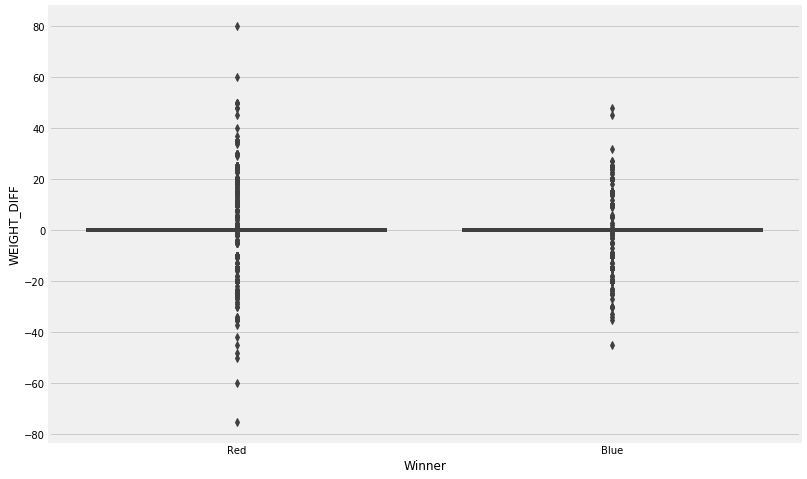

In [21]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Winner', y= 'WEIGHT_DIFF', data=df);

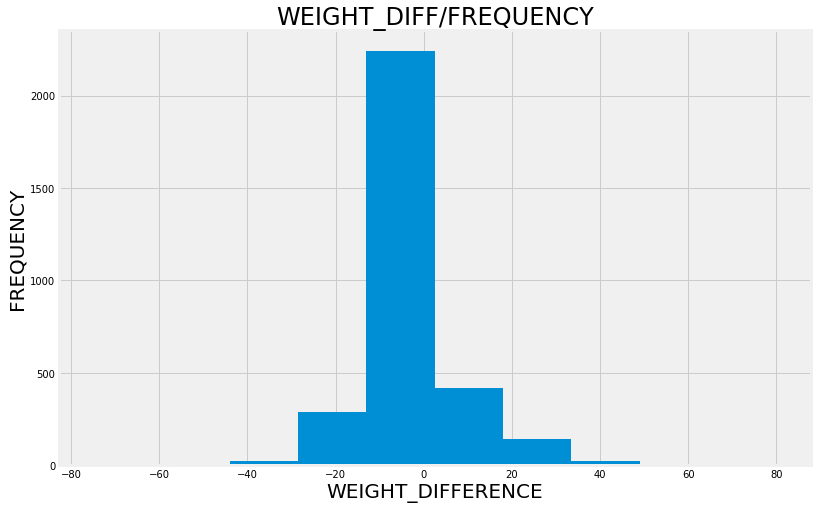

In [22]:
plt.figure(figsize=(12,8))
df['WEIGHT_DIFF'].hist()
plt.xlabel('WEIGHT_DIFFERENCE', fontsize=20)
plt.ylabel('FREQUENCY', fontsize=20)
plt.title('WEIGHT_DIFF/FREQUENCY', fontsize=24);

The fighter with more than 80 pounds difference is an outlier. Let's remove it.

In [23]:
df = df[df['WEIGHT_DIFF'] < 75]

In [24]:
df['REACH_DIFF'] = df['R_Reach_cms'] \
                        - df['B_Reach_cms']

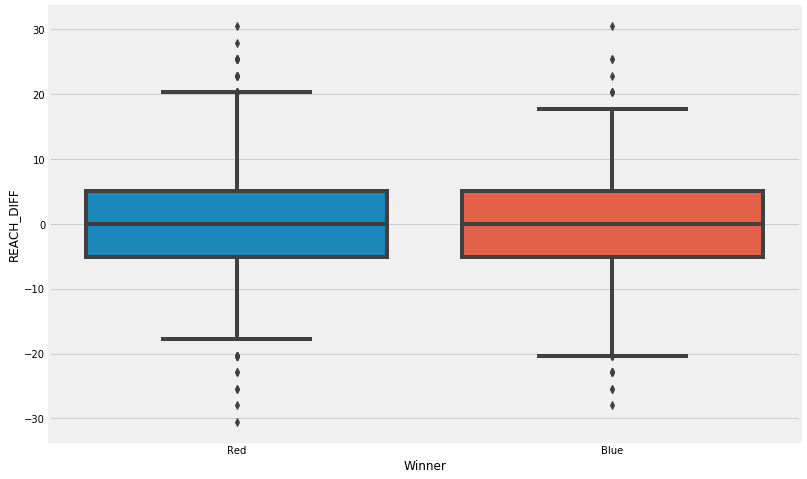

In [25]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Winner', y= 'REACH_DIFF', data=df);

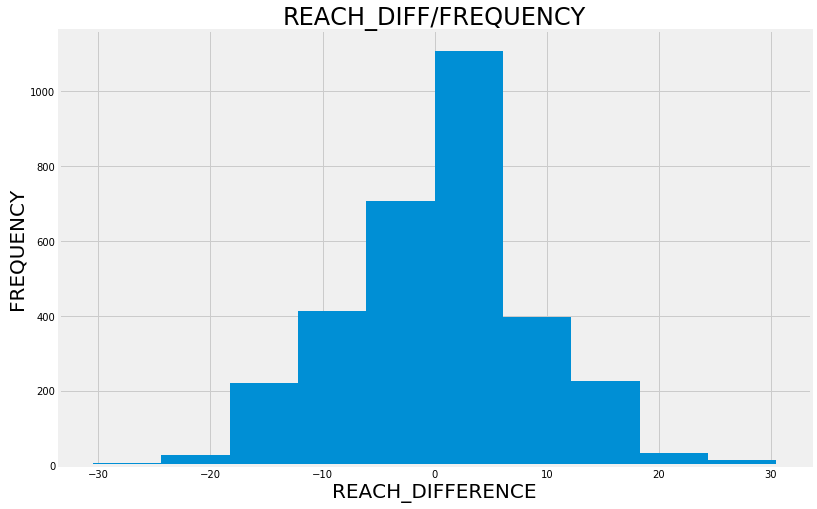

In [26]:
plt.figure(figsize=(12,8))
df['REACH_DIFF'].hist()
plt.xlabel('REACH_DIFFERENCE', fontsize=20)
plt.ylabel('FREQUENCY', fontsize=20)
plt.title('REACH_DIFF/FREQUENCY', fontsize=24);

In [27]:
df['HEIGHT_DIFF'] = df['R_Height_cms'] \
                        - df['B_Height_cms']

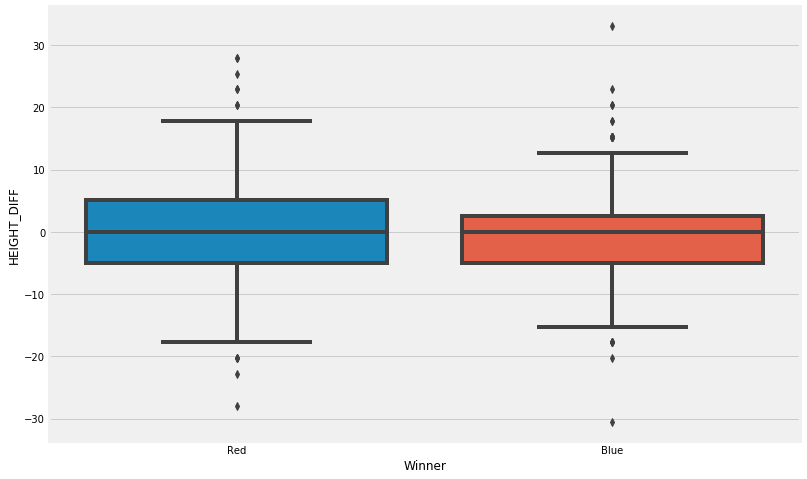

In [28]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Winner', y= 'HEIGHT_DIFF', data=df);

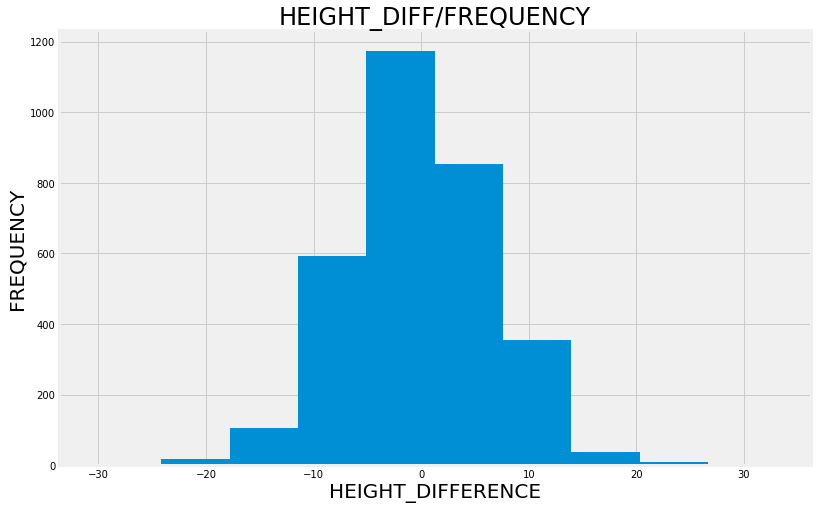

In [29]:
plt.figure(figsize=(12,8))
df['HEIGHT_DIFF'].hist()
plt.xlabel('HEIGHT_DIFFERENCE', fontsize=20)
plt.ylabel('FREQUENCY', fontsize=20)
plt.title('HEIGHT_DIFF/FREQUENCY', fontsize=24);

In [30]:
df['AGE_DIFF'] = df['R_age'] \
                        - df['B_age']

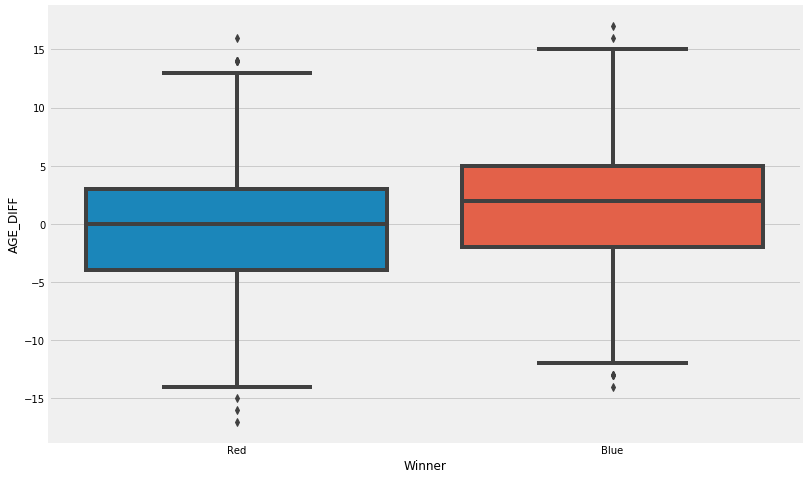

In [31]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Winner', y= 'AGE_DIFF', data=df);

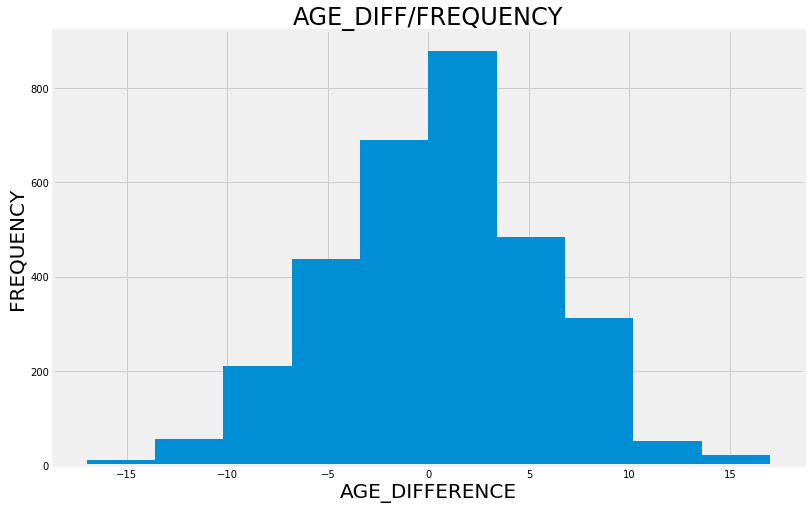

In [32]:
plt.figure(figsize=(12,8))
df['AGE_DIFF'].hist()
plt.xlabel('AGE_DIFFERENCE', fontsize=20)
plt.ylabel('FREQUENCY', fontsize=20)
plt.title('AGE_DIFF/FREQUENCY', fontsize=24);

In [33]:
df['KO_DIFF'] = df['R_avg_KD'] \
                        - df['B_avg_KD']

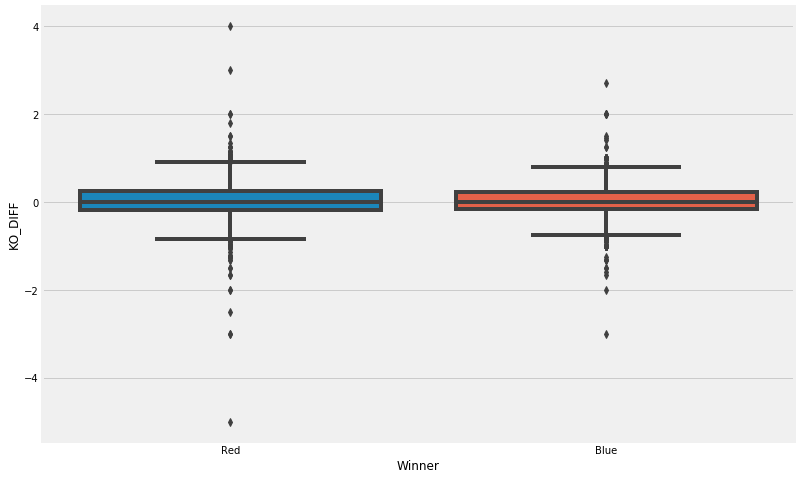

In [34]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Winner', y= 'KO_DIFF', data=df);

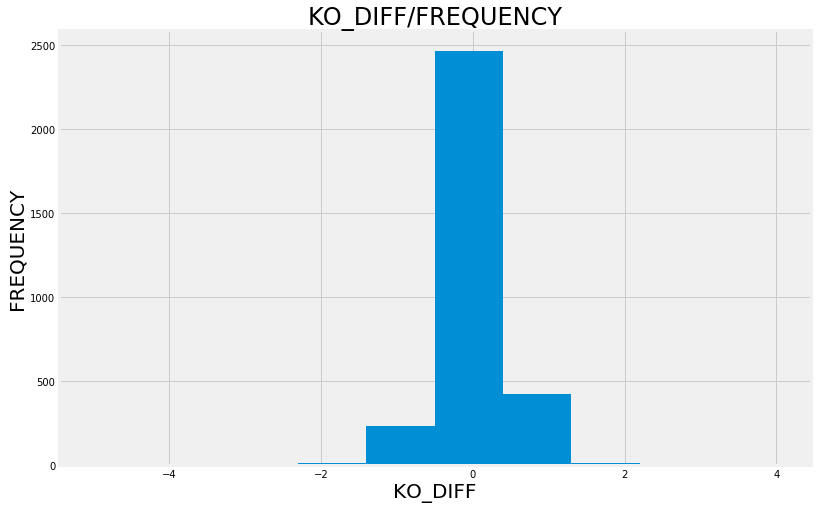

In [35]:
plt.figure(figsize=(12,8))
df['KO_DIFF'].hist()
plt.xlabel('KO_DIFF', fontsize=20)
plt.ylabel('FREQUENCY', fontsize=20)
plt.title('KO_DIFF/FREQUENCY', fontsize=24);

In [36]:
df['TOT_STR_DIFF'] = df['R_avg_TOTAL_STR_landed'] \
                        - df['B_avg_TOTAL_STR_landed']

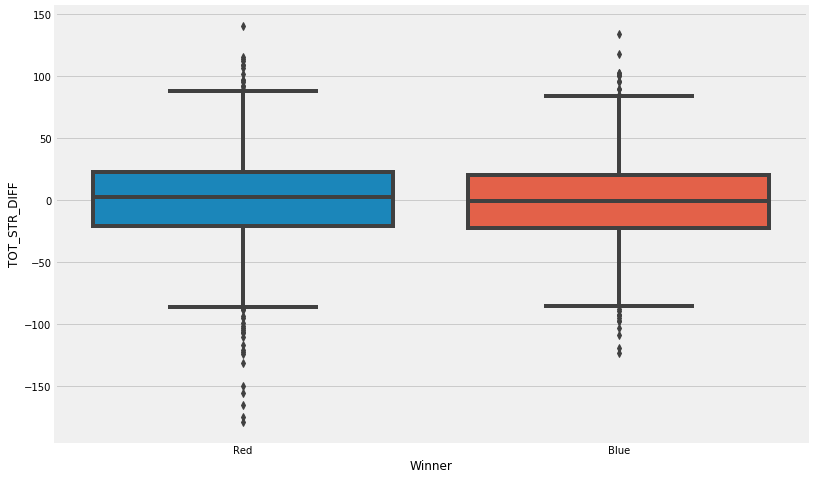

In [37]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Winner', y= 'TOT_STR_DIFF', data=df);

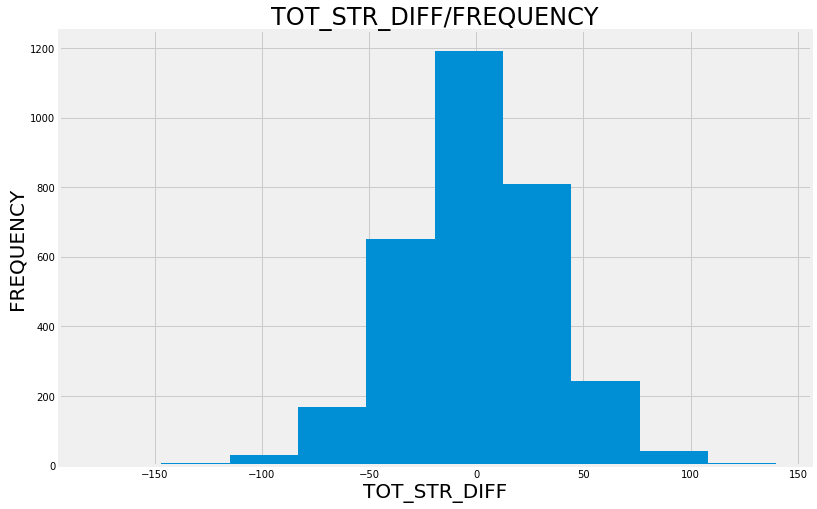

In [38]:
plt.figure(figsize=(12,8))
df['TOT_STR_DIFF'].hist()
plt.xlabel('TOT_STR_DIFF', fontsize=20)
plt.ylabel('FREQUENCY', fontsize=20)
plt.title('TOT_STR_DIFF/FREQUENCY', fontsize=24);

In [39]:
df['TOT_STR_ATT_DIFF'] = df['R_avg_TOTAL_STR_att'] \
                        - df['B_avg_TOTAL_STR_att']

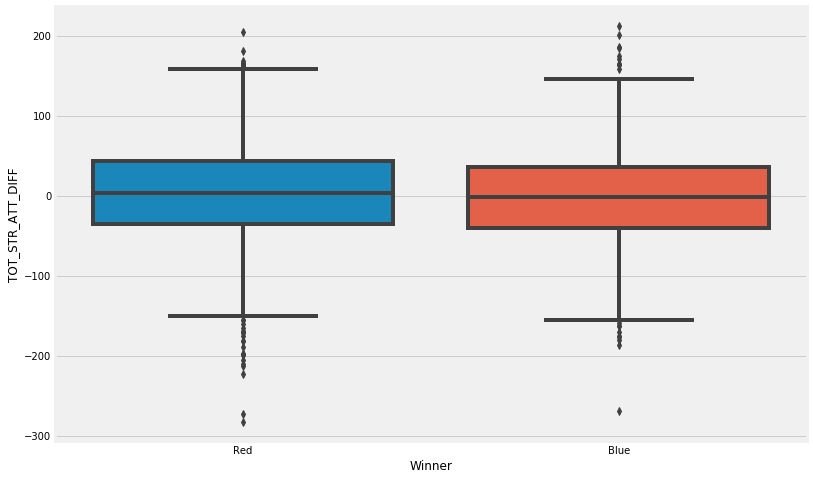

In [40]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Winner', y= 'TOT_STR_ATT_DIFF', data=df);

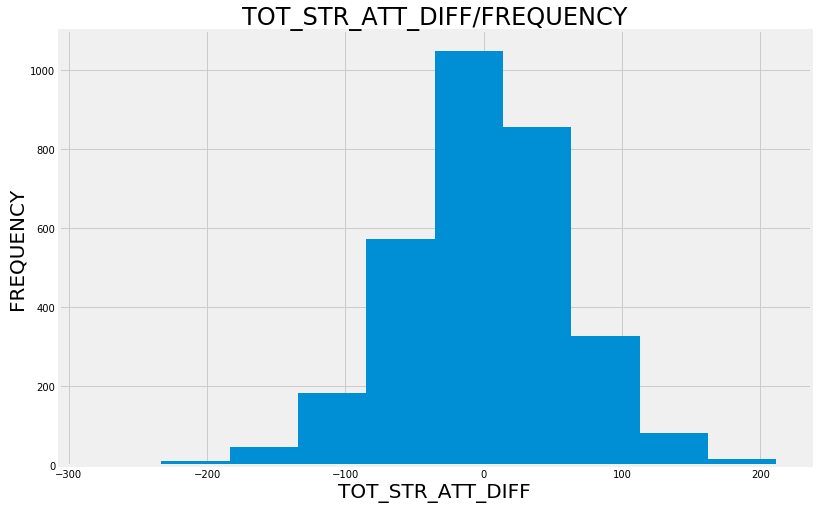

In [41]:
plt.figure(figsize=(12,8))
df['TOT_STR_ATT_DIFF'].hist()
plt.xlabel('TOT_STR_ATT_DIFF', fontsize=20)
plt.ylabel('FREQUENCY', fontsize=20)
plt.title('TOT_STR_ATT_DIFF/FREQUENCY', fontsize=24);

In [42]:
df['DIST_STRIKE_DIFF'] = df['R_avg_DISTANCE_landed'] \
                        - df['B_avg_DISTANCE_landed']

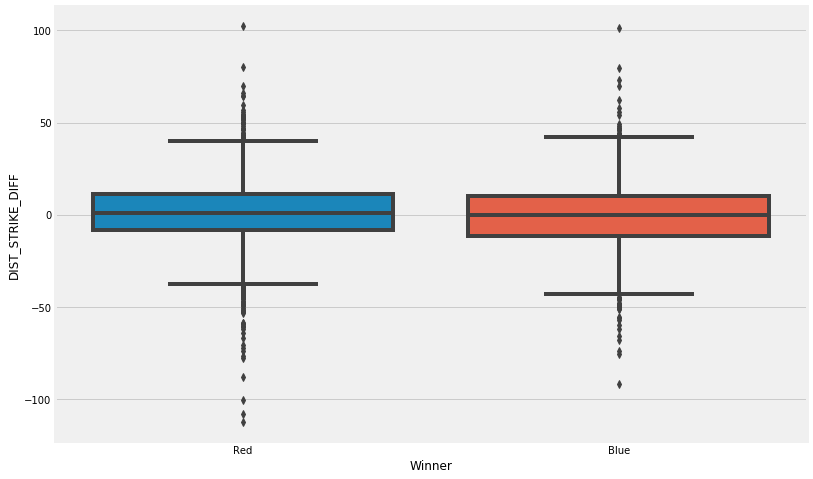

In [43]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Winner', y= 'DIST_STRIKE_DIFF', data=df);

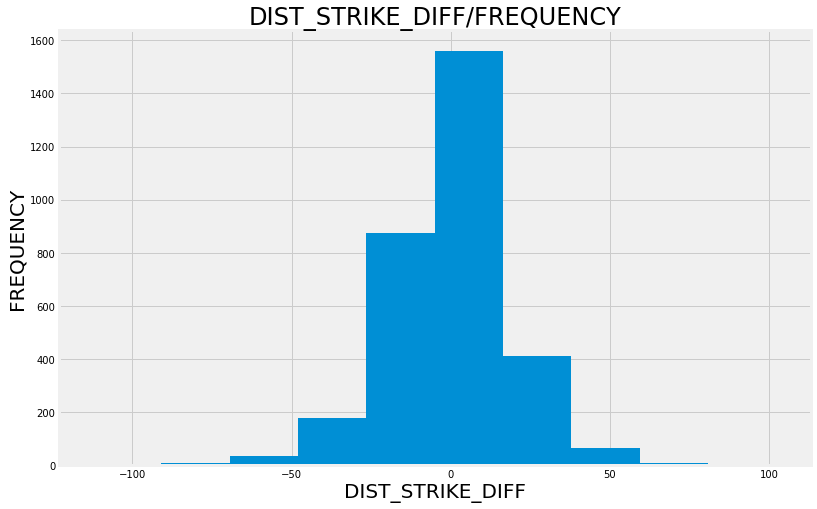

In [44]:
plt.figure(figsize=(12,8))
df['DIST_STRIKE_DIFF'].hist()
plt.xlabel('DIST_STRIKE_DIFF', fontsize=20)
plt.ylabel('FREQUENCY', fontsize=20)
plt.title('DIST_STRIKE_DIFF/FREQUENCY', fontsize=24);

In [45]:
df['DIST_STRIKE_ATT_DIFF'] = df['R_avg_DISTANCE_att'] \
                        - df['B_avg_DISTANCE_att']

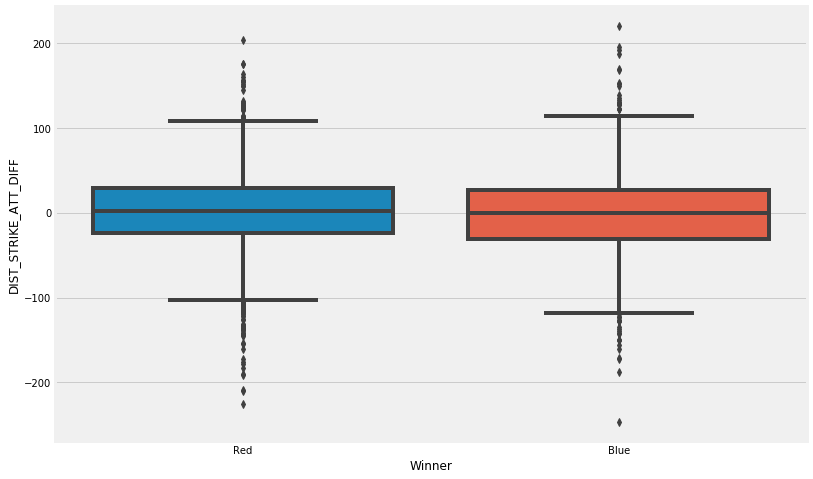

In [46]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Winner', y= 'DIST_STRIKE_ATT_DIFF', data=df);

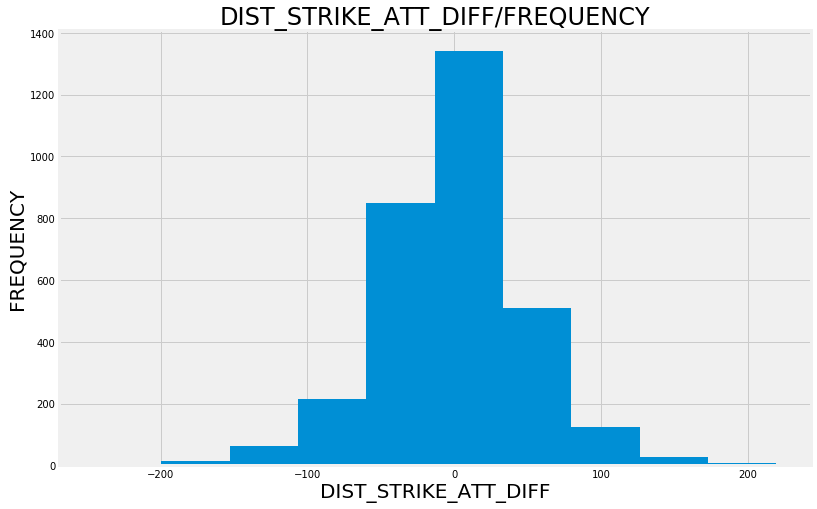

In [47]:
plt.figure(figsize=(12,8))
df['DIST_STRIKE_ATT_DIFF'].hist()
plt.xlabel('DIST_STRIKE_ATT_DIFF', fontsize=20)
plt.ylabel('FREQUENCY', fontsize=20)
plt.title('DIST_STRIKE_ATT_DIFF/FREQUENCY', fontsize=24);

In [48]:
df['PASS_DIFF'] = df['R_avg_PASS'] \
                        - df['B_avg_PASS']

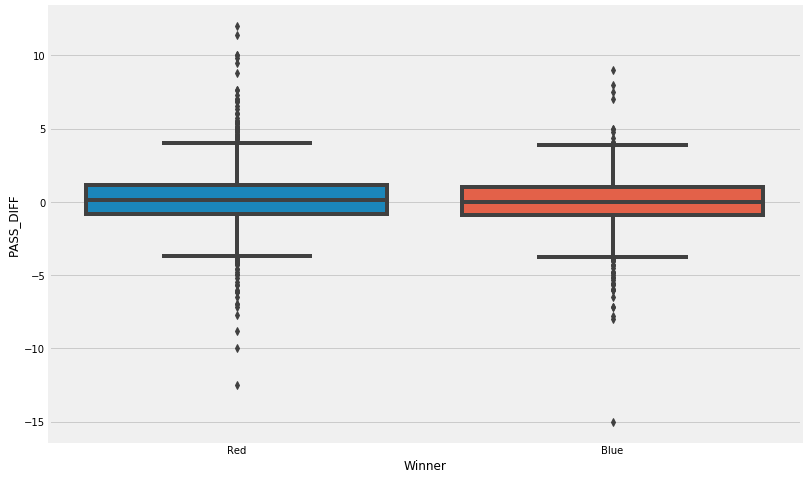

In [49]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Winner', y= 'PASS_DIFF', data=df);

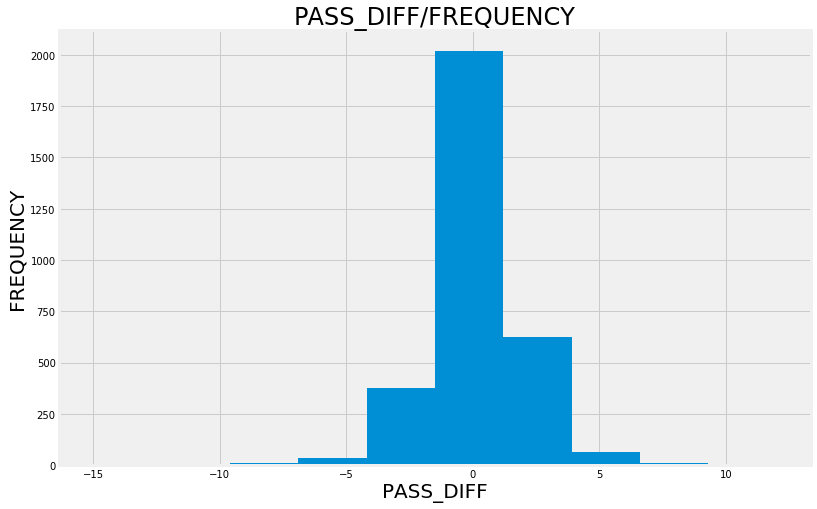

In [50]:
plt.figure(figsize=(12,8))
df['PASS_DIFF'].hist()
plt.xlabel('PASS_DIFF', fontsize=20)
plt.ylabel('FREQUENCY', fontsize=20)
plt.title('PASS_DIFF/FREQUENCY', fontsize=24);

In [51]:
df['REV_DIFF'] = df['R_avg_REV'] \
                        - df['B_avg_REV']

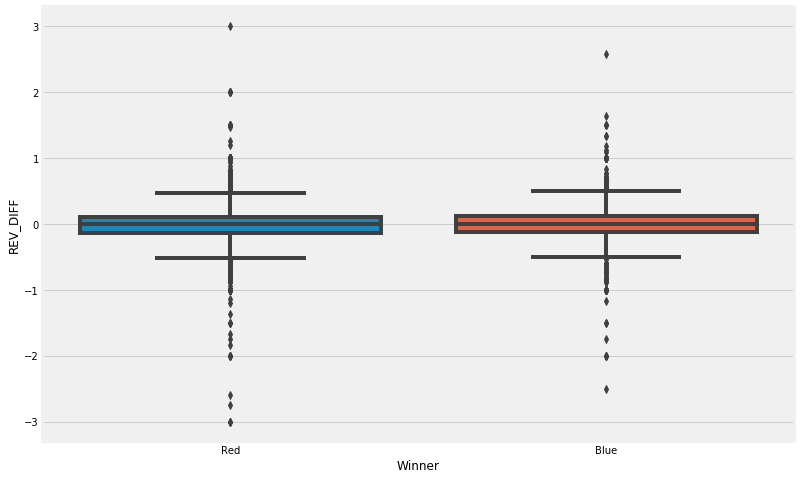

In [52]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Winner', y= 'REV_DIFF', data=df);

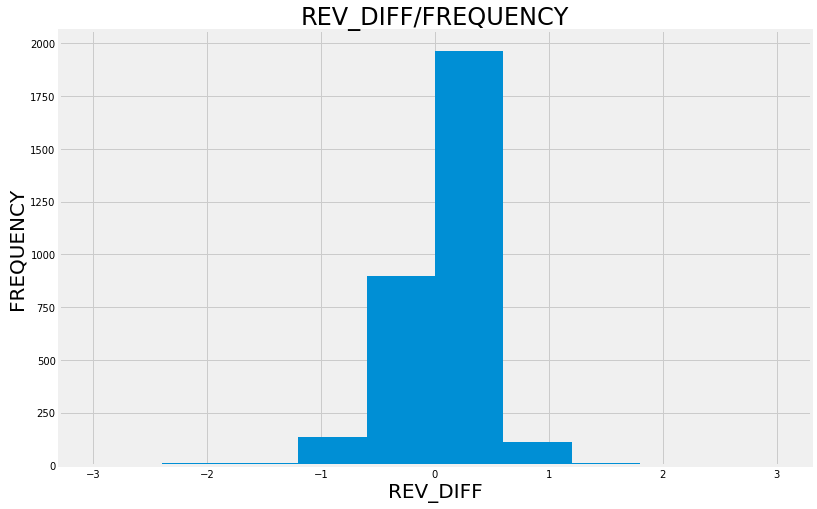

In [53]:
plt.figure(figsize=(12,8))
df['REV_DIFF'].hist()
plt.xlabel('REV_DIFF', fontsize=20)
plt.ylabel('FREQUENCY', fontsize=20)
plt.title('REV_DIFF/FREQUENCY', fontsize=24);

In [54]:
df['LEG_DIFF'] = df['R_avg_LEG_landed'] \
                        - df['B_avg_LEG_landed']

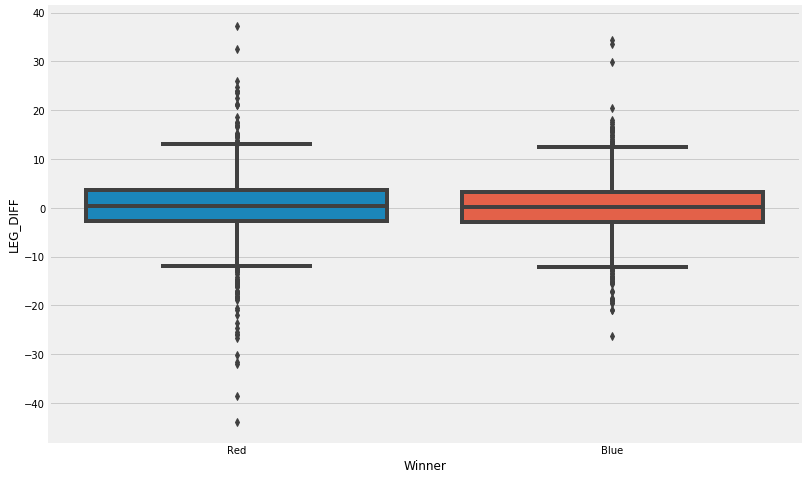

In [55]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Winner', y= 'LEG_DIFF', data=df);

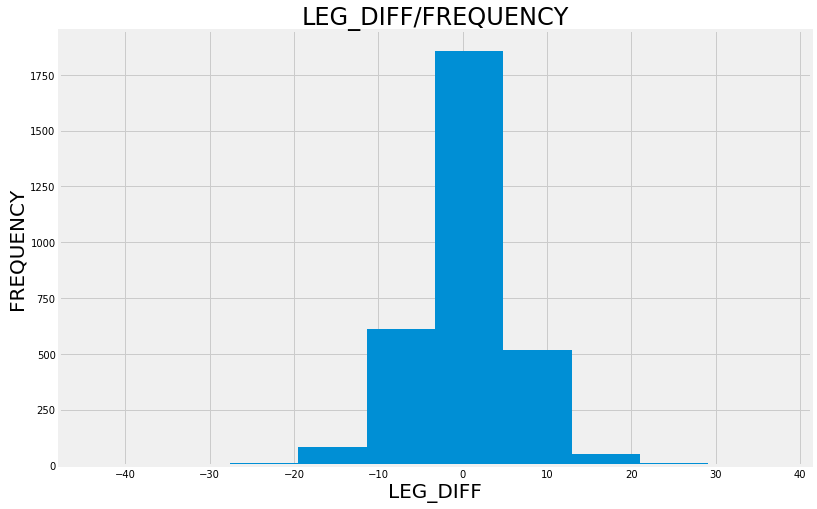

In [56]:
plt.figure(figsize=(12,8))
df['LEG_DIFF'].hist()
plt.xlabel('LEG_DIFF', fontsize=20)
plt.ylabel('FREQUENCY', fontsize=20)
plt.title('LEG_DIFF/FREQUENCY', fontsize=24);

In [57]:
df['LEG_ATT_DIFF'] = df['R_avg_LEG_att'] \
                        - df['B_avg_LEG_att']

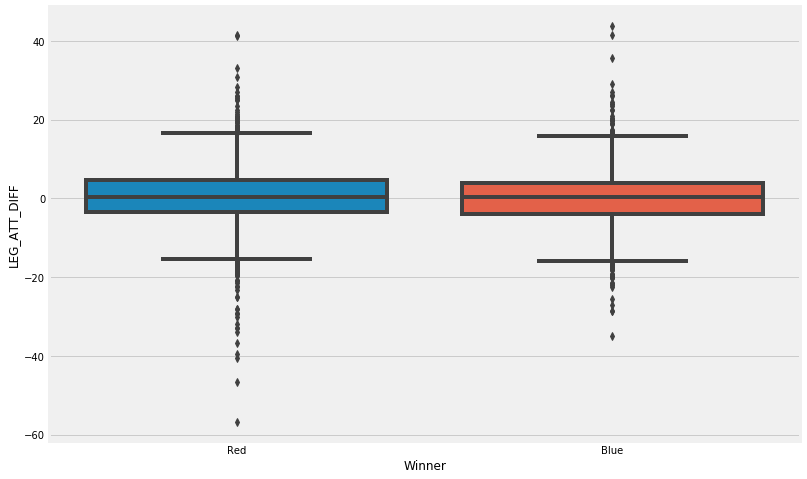

In [58]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Winner', y= 'LEG_ATT_DIFF', data=df);

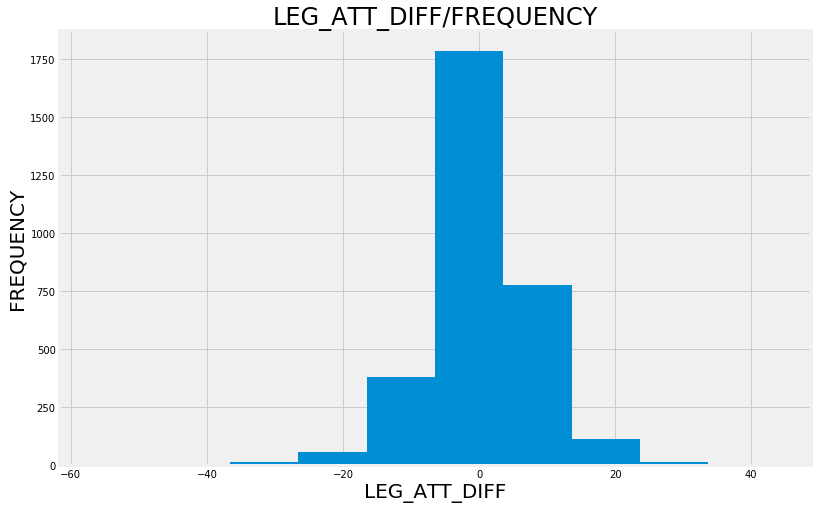

In [59]:
plt.figure(figsize=(12,8))
df['LEG_ATT_DIFF'].hist()
plt.xlabel('LEG_ATT_DIFF', fontsize=20)
plt.ylabel('FREQUENCY', fontsize=20)
plt.title('LEG_ATT_DIFF/FREQUENCY', fontsize=24);

In [60]:
df['CLINCH_DIFF'] = df['R_avg_CLINCH_landed'] \
                        - df['B_avg_CLINCH_landed']

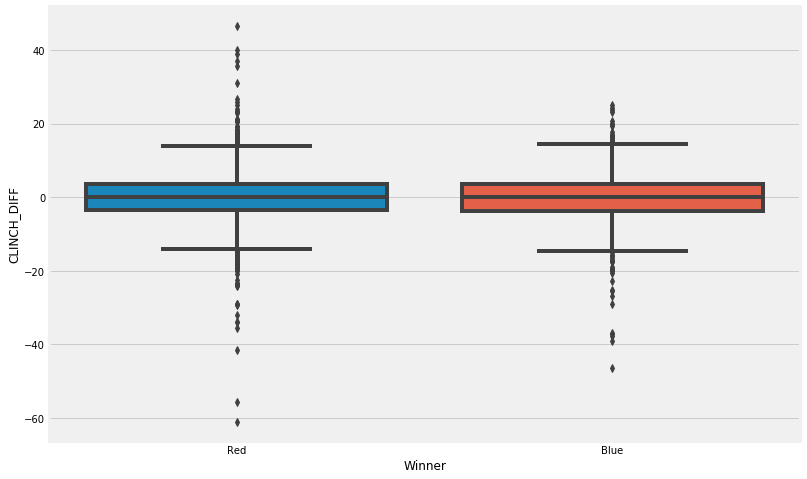

In [61]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Winner', y= 'CLINCH_DIFF', data=df);

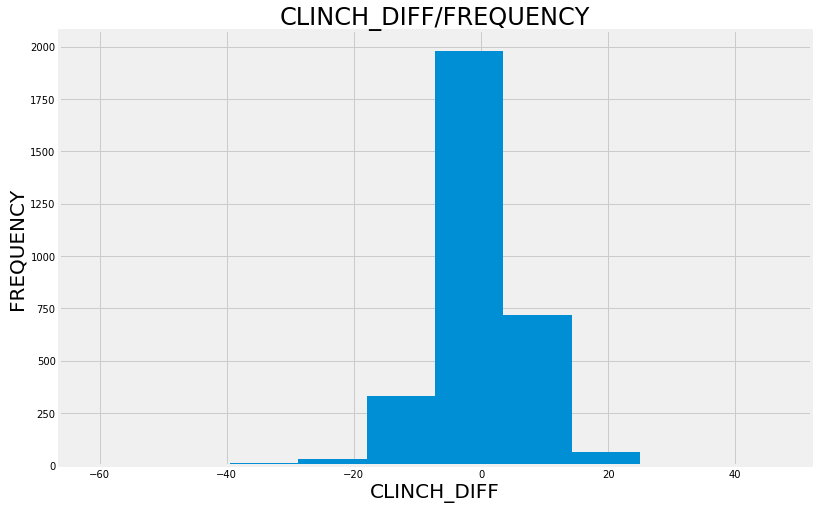

In [62]:
plt.figure(figsize=(12,8))
df['CLINCH_DIFF'].hist()
plt.xlabel('CLINCH_DIFF', fontsize=20)
plt.ylabel('FREQUENCY', fontsize=20)
plt.title('CLINCH_DIFF/FREQUENCY', fontsize=24);

In [63]:
df['CLINCH_ATT_DIFF'] = df['R_avg_CLINCH_att'] \
                        - df['B_avg_CLINCH_att']

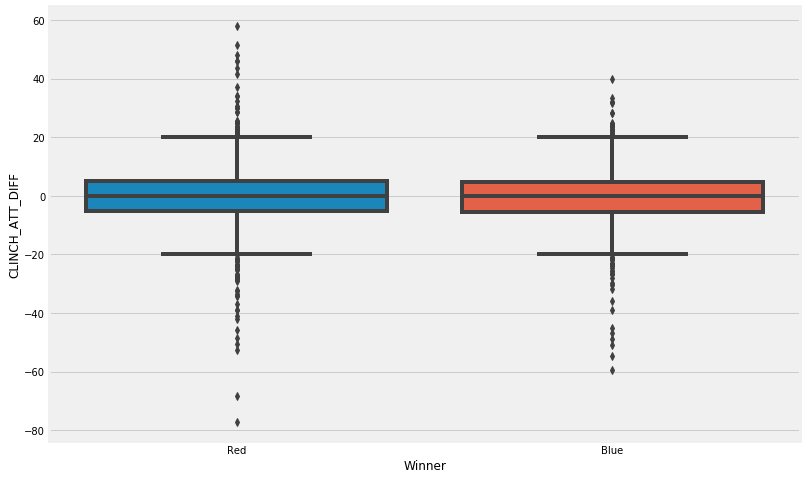

In [64]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Winner', y= 'CLINCH_ATT_DIFF', data=df);

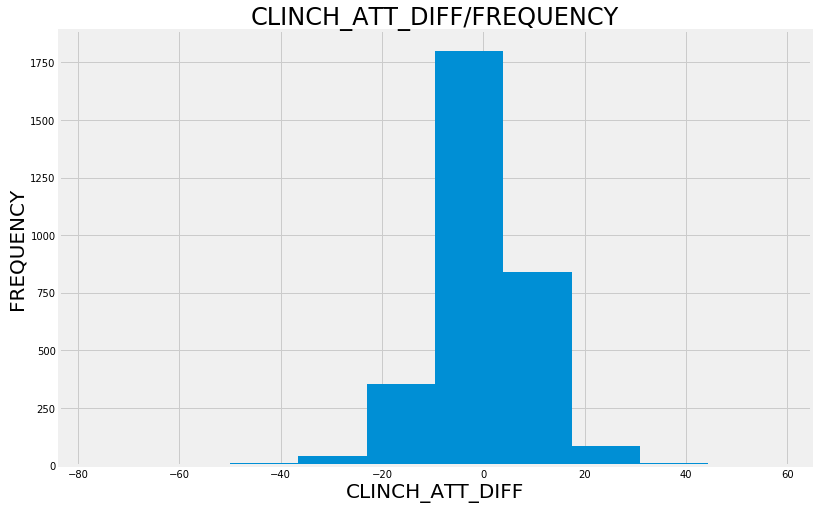

In [65]:
plt.figure(figsize=(12,8))
df['CLINCH_ATT_DIFF'].hist()
plt.xlabel('CLINCH_ATT_DIFF', fontsize=20)
plt.ylabel('FREQUENCY', fontsize=20)
plt.title('CLINCH_ATT_DIFF/FREQUENCY', fontsize=24);

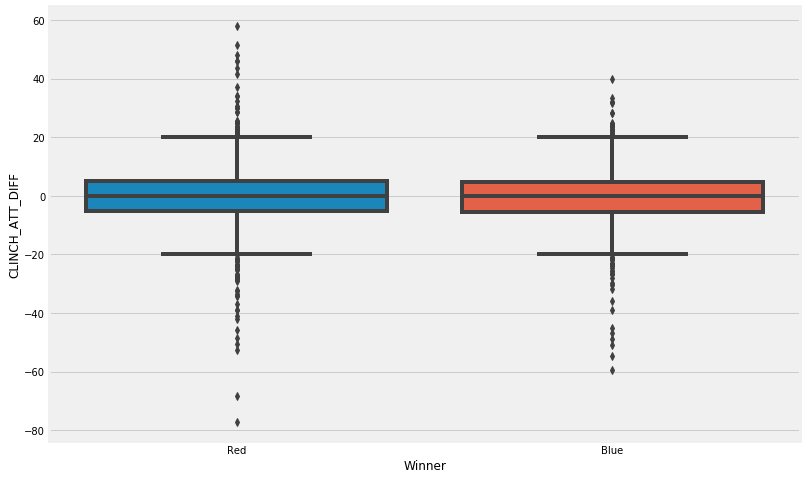

In [66]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Winner', y= 'CLINCH_ATT_DIFF', data=df);

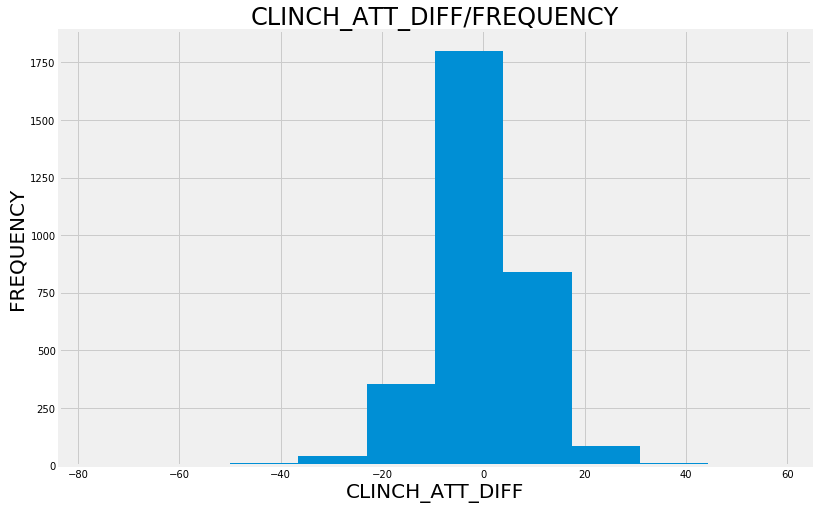

In [67]:
plt.figure(figsize=(12,8))
df['CLINCH_ATT_DIFF'].hist()
plt.xlabel('CLINCH_ATT_DIFF', fontsize=20)
plt.ylabel('FREQUENCY', fontsize=20)
plt.title('CLINCH_ATT_DIFF/FREQUENCY', fontsize=24);

In [68]:
df['BODY_STR_DIFF'] = df['R_avg_BODY_landed'] \
                        - df['B_avg_BODY_landed']

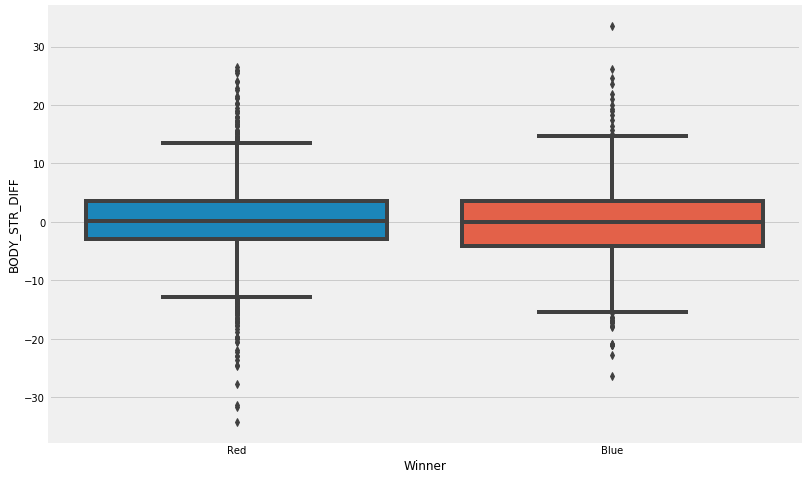

In [69]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Winner', y= 'BODY_STR_DIFF', data=df);

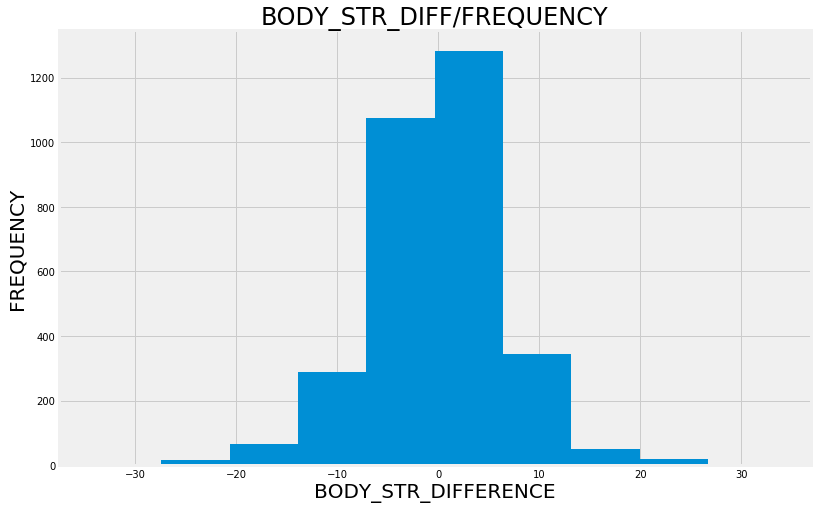

In [70]:
plt.figure(figsize=(12,8))
df['BODY_STR_DIFF'].hist()
plt.xlabel('BODY_STR_DIFFERENCE', fontsize=20)
plt.ylabel('FREQUENCY', fontsize=20)
plt.title('BODY_STR_DIFF/FREQUENCY', fontsize=24);

In [71]:
df['BODY_STR_ATT_DIFF'] = df['R_avg_BODY_att'] \
                        - df['B_avg_BODY_att']

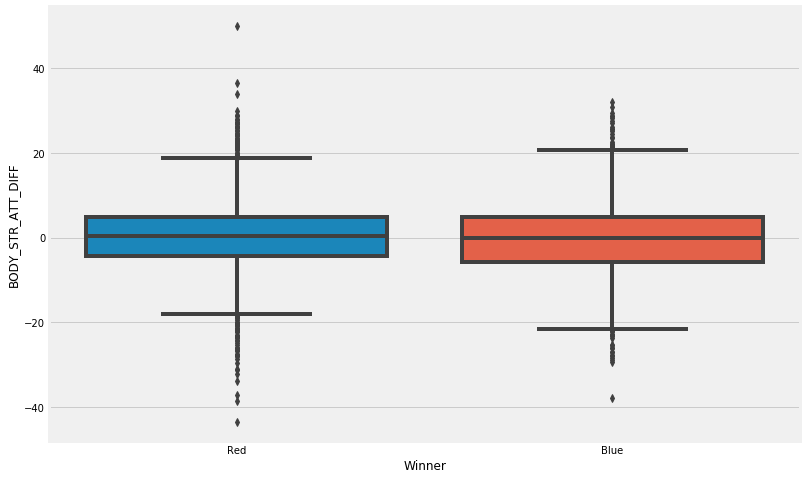

In [72]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Winner', y= 'BODY_STR_ATT_DIFF', data=df);

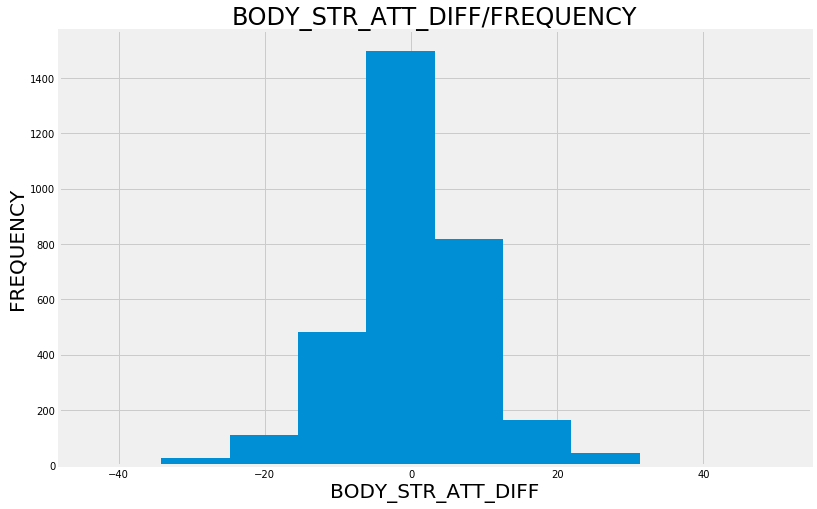

In [73]:
plt.figure(figsize=(12,8))
df['BODY_STR_ATT_DIFF'].hist()
plt.xlabel('BODY_STR_ATT_DIFF', fontsize=20)
plt.ylabel('FREQUENCY', fontsize=20)
plt.title('BODY_STR_ATT_DIFF/FREQUENCY', fontsize=24);

In [74]:
df['HEAD_STR_DIFF'] = df['R_avg_HEAD_landed'] \
                        - df['B_avg_HEAD_landed']

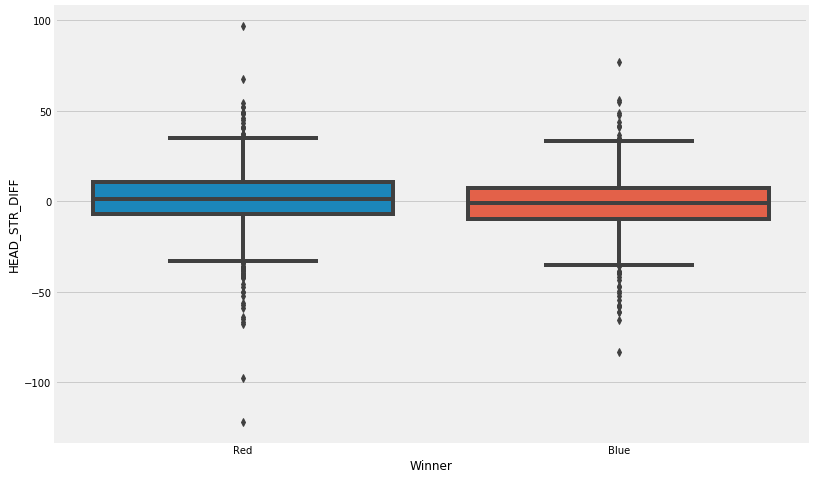

In [75]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Winner', y= 'HEAD_STR_DIFF', data=df);

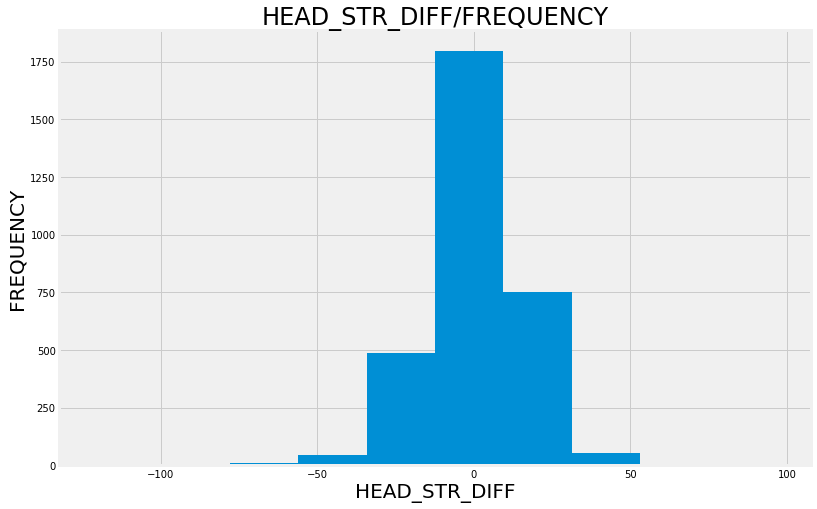

In [76]:
plt.figure(figsize=(12,8))
df['HEAD_STR_DIFF'].hist()
plt.xlabel('HEAD_STR_DIFF', fontsize=20)
plt.ylabel('FREQUENCY', fontsize=20)
plt.title('HEAD_STR_DIFF/FREQUENCY', fontsize=24);

In [77]:
df['HEAD_STR_ATT_DIFF'] = df['R_avg_HEAD_att'] \
                        - df['B_avg_HEAD_att']

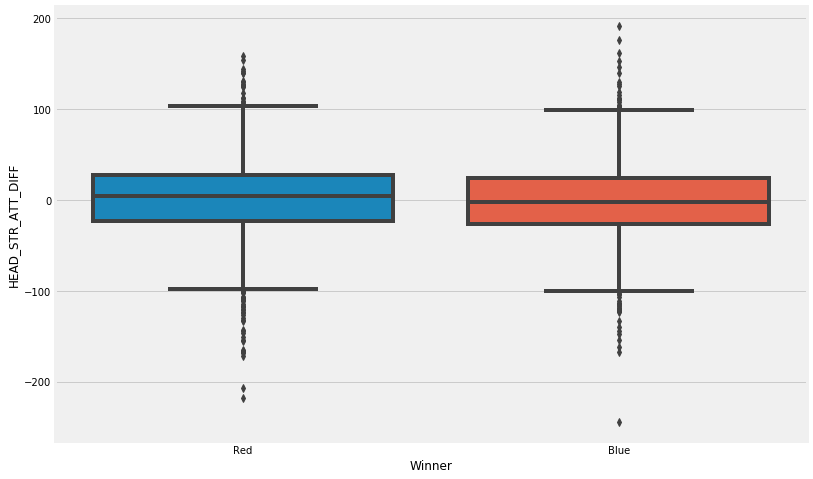

In [78]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Winner', y= 'HEAD_STR_ATT_DIFF', data=df);

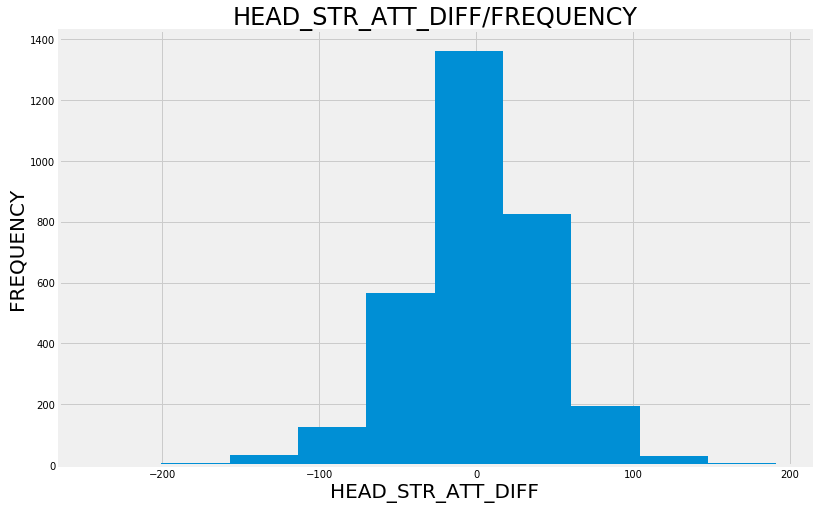

In [79]:
plt.figure(figsize=(12,8))
df['HEAD_STR_ATT_DIFF'].hist()
plt.xlabel('HEAD_STR_ATT_DIFF', fontsize=20)
plt.ylabel('FREQUENCY', fontsize=20)
plt.title('HEAD_STR_ATT_DIFF/FREQUENCY', fontsize=24);

In [80]:
df['GROUND_STR_DIFF'] = df['R_avg_GROUND_landed'] \
                        - df['B_avg_GROUND_landed']

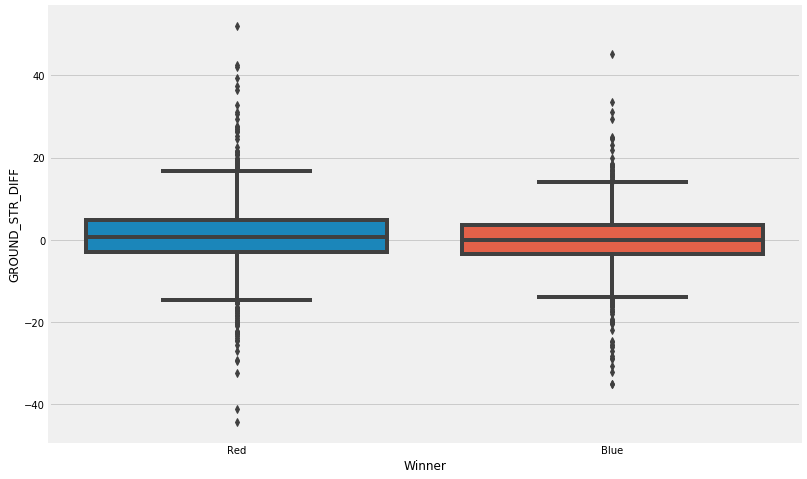

In [81]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Winner', y= 'GROUND_STR_DIFF', data=df);

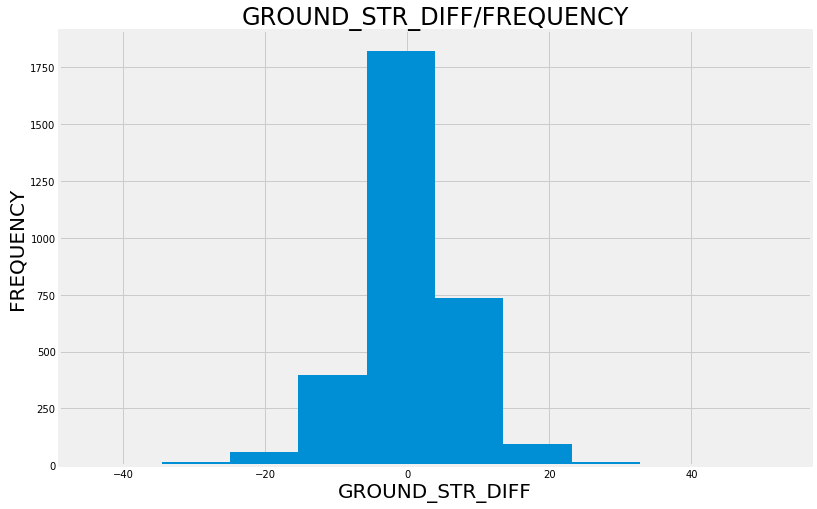

In [82]:
plt.figure(figsize=(12,8))
df['GROUND_STR_DIFF'].hist()
plt.xlabel('GROUND_STR_DIFF', fontsize=20)
plt.ylabel('FREQUENCY', fontsize=20)
plt.title('GROUND_STR_DIFF/FREQUENCY', fontsize=24);

In [83]:
df['GROUND_STR_ATT_DIFF'] = df['R_avg_GROUND_att'] \
                        - df['B_avg_GROUND_att']

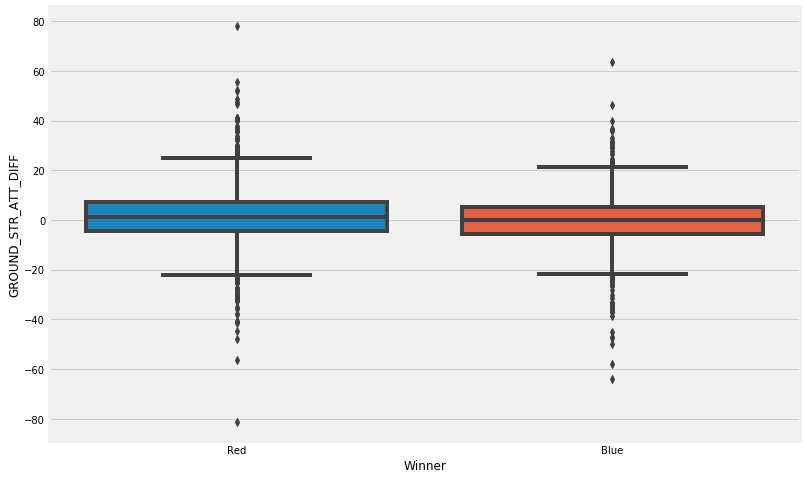

In [84]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Winner', y= 'GROUND_STR_ATT_DIFF', data=df);

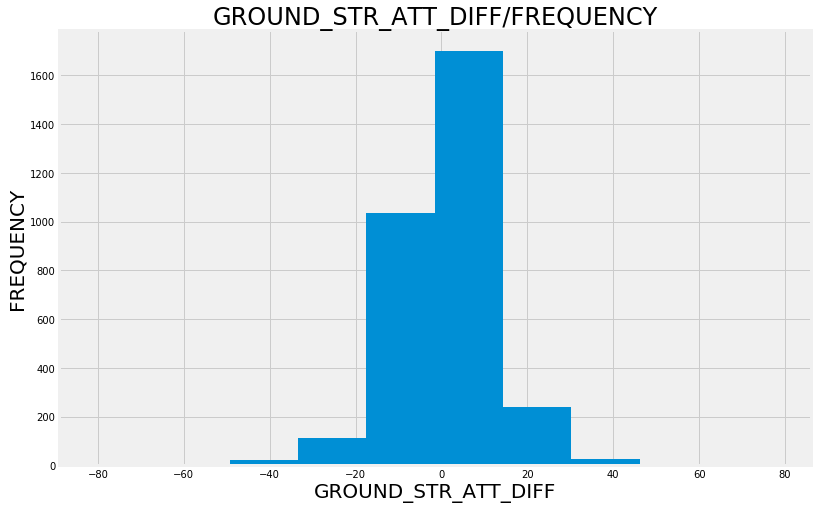

In [85]:
plt.figure(figsize=(12,8))
df['GROUND_STR_ATT_DIFF'].hist()
plt.xlabel('GROUND_STR_ATT_DIFF', fontsize=20)
plt.ylabel('FREQUENCY', fontsize=20)
plt.title('GROUND_STR_ATT_DIFF/FREQUENCY', fontsize=24);

In [86]:
df['SIG_STR_DIFF'] = df['R_avg_SIG_STR_landed'] \
                        - df['B_avg_SIG_STR_landed']

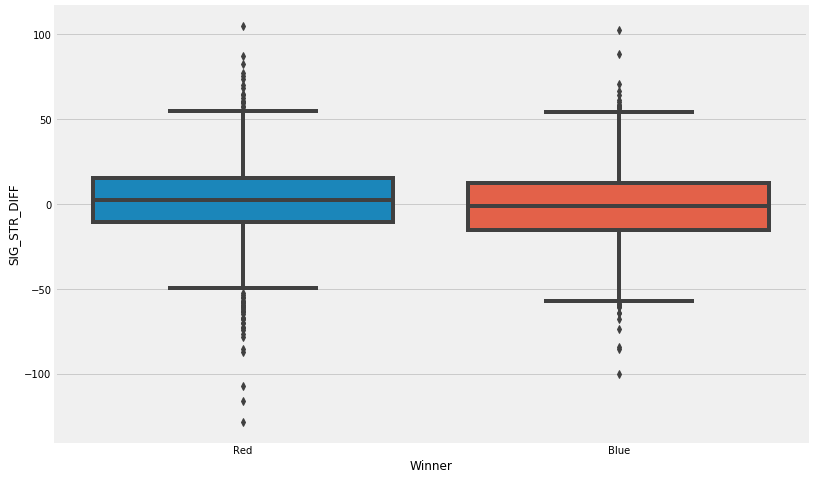

In [87]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Winner', y= 'SIG_STR_DIFF', data=df);

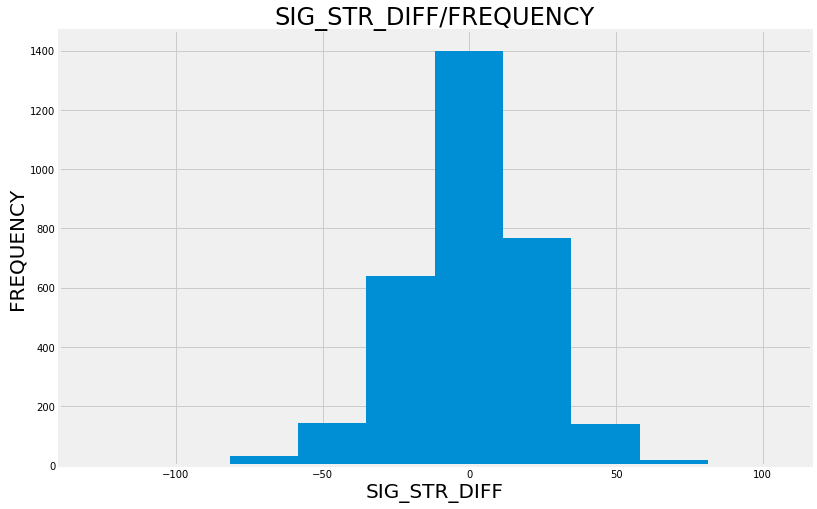

In [88]:
plt.figure(figsize=(12,8))
df['SIG_STR_DIFF'].hist()
plt.xlabel('SIG_STR_DIFF', fontsize=20)
plt.ylabel('FREQUENCY', fontsize=20)
plt.title('SIG_STR_DIFF/FREQUENCY', fontsize=24);

In [89]:
df['SIG_STR_ATT_DIFF'] = df['R_avg_SIG_STR_att'] \
                        - df['B_avg_SIG_STR_att']

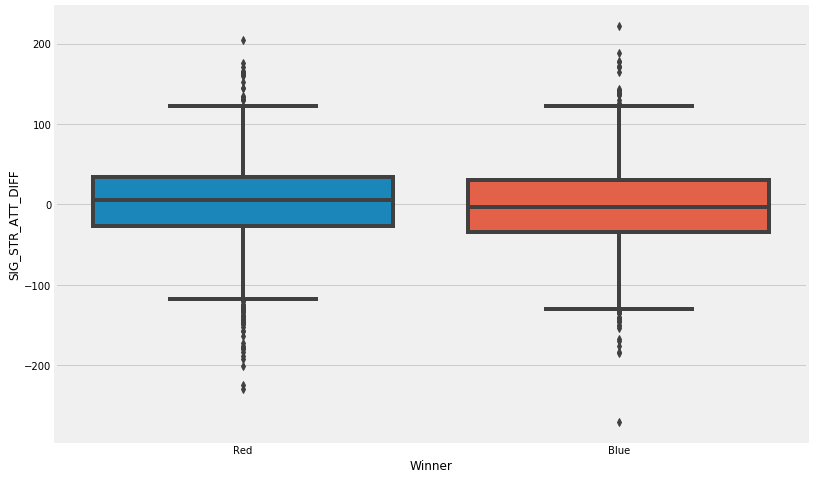

In [90]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Winner', y= 'SIG_STR_ATT_DIFF', data=df);

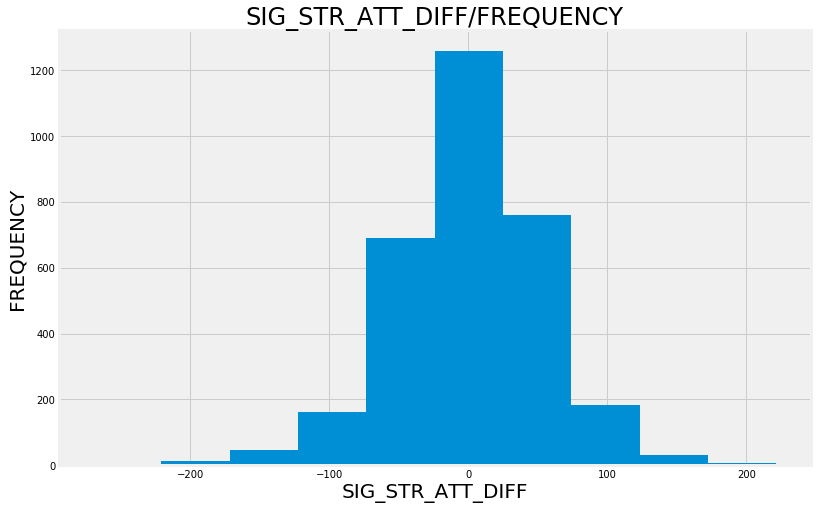

In [91]:
plt.figure(figsize=(12,8))
df['SIG_STR_ATT_DIFF'].hist()
plt.xlabel('SIG_STR_ATT_DIFF', fontsize=20)
plt.ylabel('FREQUENCY', fontsize=20)
plt.title('SIG_STR_ATT_DIFF/FREQUENCY', fontsize=24);

In [92]:
df['TAKEDOWN_DIFF'] = df['R_avg_TD_landed'] \
                        - df['B_avg_TD_landed']

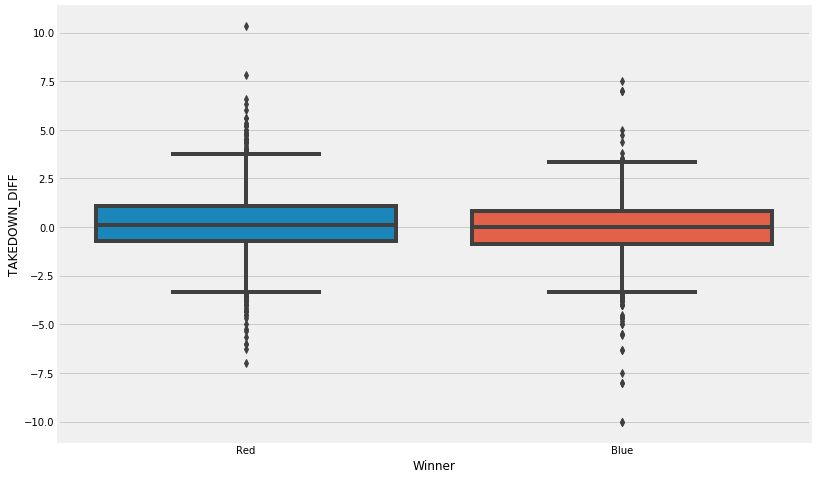

In [93]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Winner', y= 'TAKEDOWN_DIFF', data=df);

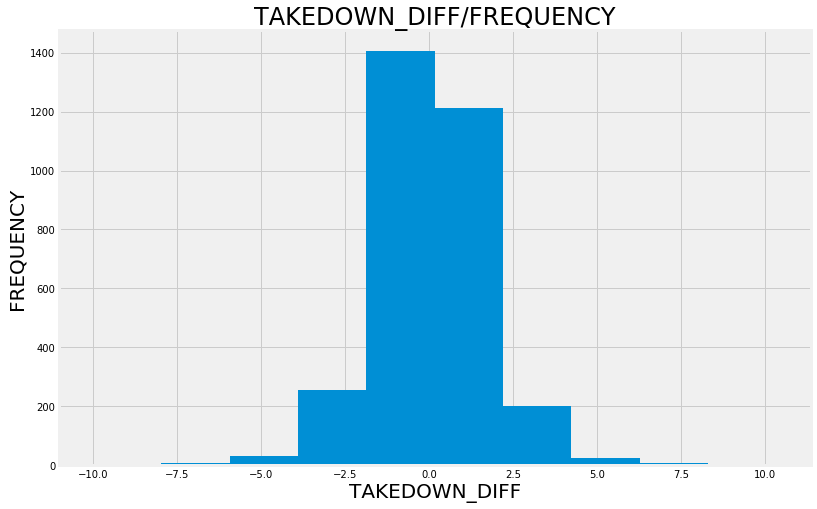

In [94]:
plt.figure(figsize=(12,8))
df['TAKEDOWN_DIFF'].hist()
plt.xlabel('TAKEDOWN_DIFF', fontsize=20)
plt.ylabel('FREQUENCY', fontsize=20)
plt.title('TAKEDOWN_DIFF/FREQUENCY', fontsize=24);

In [95]:
df['TAKEDOWN_ATT_DIFF'] = df['R_avg_TD_att'] \
                        - df['B_avg_TD_att']

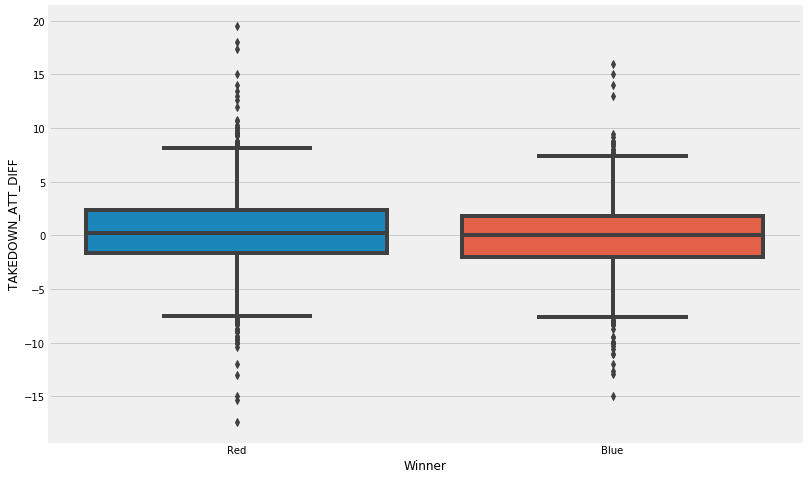

In [96]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Winner', y= 'TAKEDOWN_ATT_DIFF', data=df);

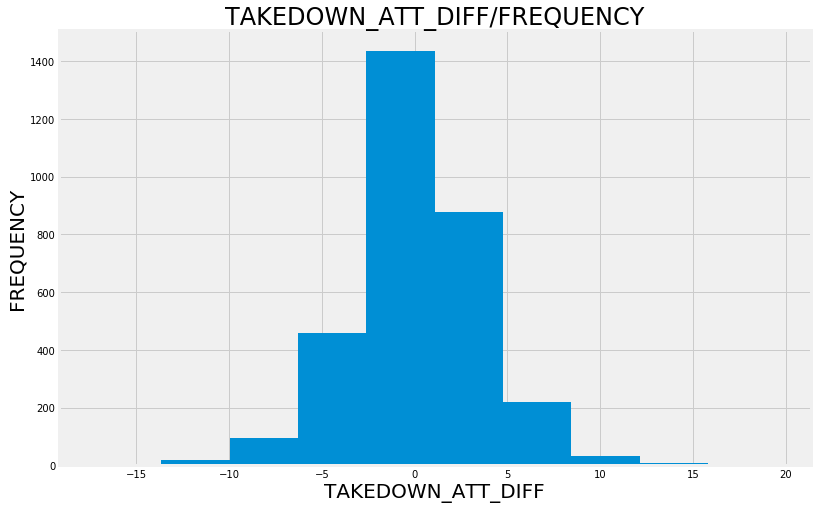

In [97]:
plt.figure(figsize=(12,8))
df['TAKEDOWN_ATT_DIFF'].hist()
plt.xlabel('TAKEDOWN_ATT_DIFF', fontsize=20)
plt.ylabel('FREQUENCY', fontsize=20)
plt.title('TAKEDOWN_ATT_DIFF/FREQUENCY', fontsize=24);

In [98]:
df['SUB_ATT_DIFF'] = df['R_avg_SUB_ATT'] \
                        - df['B_avg_SUB_ATT']

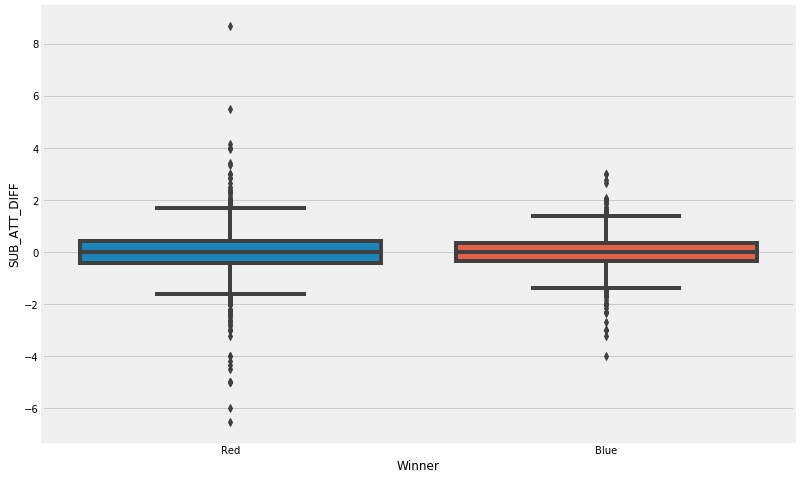

In [99]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Winner', y= 'SUB_ATT_DIFF', data=df);

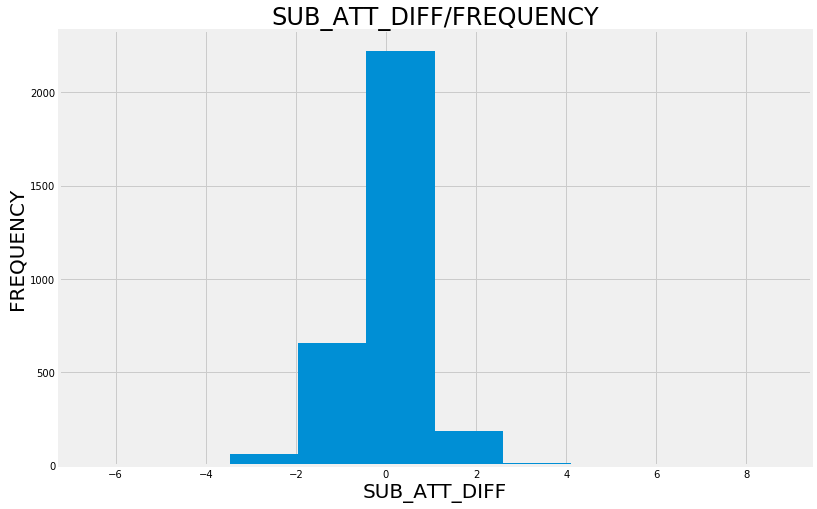

In [100]:
plt.figure(figsize=(12,8))
df['SUB_ATT_DIFF'].hist()
plt.xlabel('SUB_ATT_DIFF', fontsize=20)
plt.ylabel('FREQUENCY', fontsize=20)
plt.title('SUB_ATT_DIFF/FREQUENCY', fontsize=24);

In [101]:
df['SECONDS_FOUGHT_DIFF'] = df['R_total_time_fought(seconds)'] \
                        - df['B_total_time_fought(seconds)']

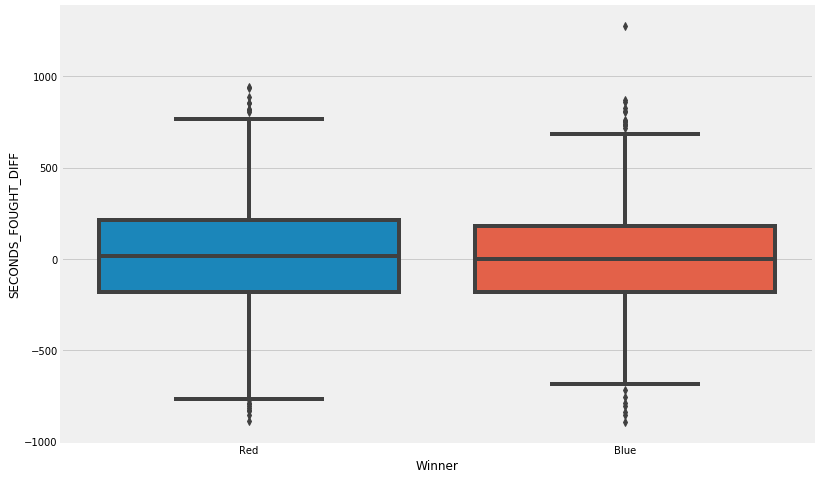

In [102]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Winner', y= 'SECONDS_FOUGHT_DIFF', data=df);

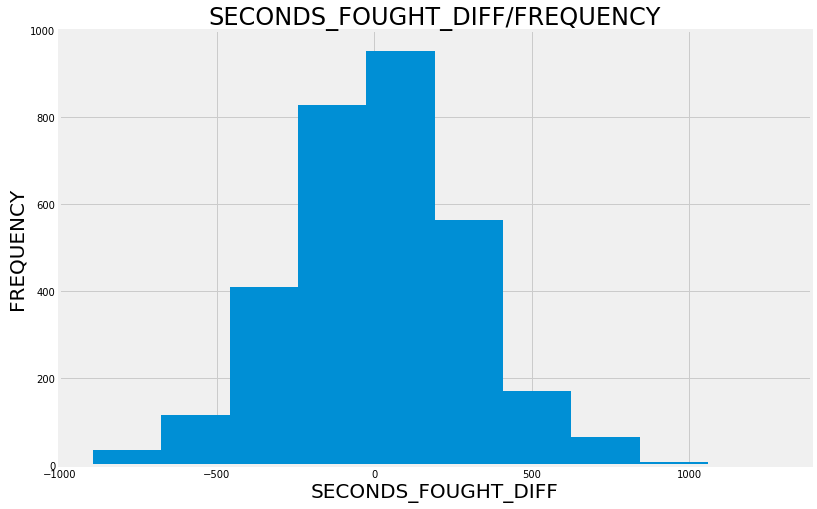

In [103]:
plt.figure(figsize=(12,8))
df['SECONDS_FOUGHT_DIFF'].hist()
plt.xlabel('SECONDS_FOUGHT_DIFF', fontsize=20)
plt.ylabel('FREQUENCY', fontsize=20)
plt.title('SECONDS_FOUGHT_DIFF/FREQUENCY', fontsize=24);

In [104]:
df['TOT_ROUND_FOUGHT_DIFF'] = df['R_total_rounds_fought'] \
                        - df['B_total_rounds_fought']

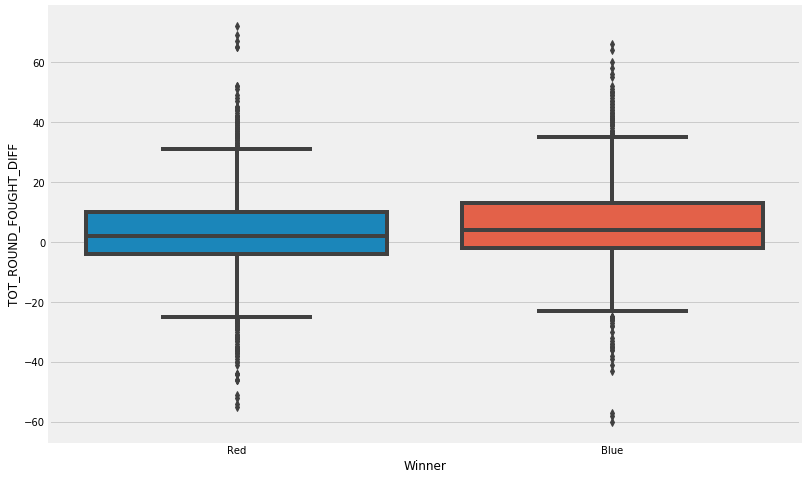

In [105]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Winner', y= 'TOT_ROUND_FOUGHT_DIFF', data=df);

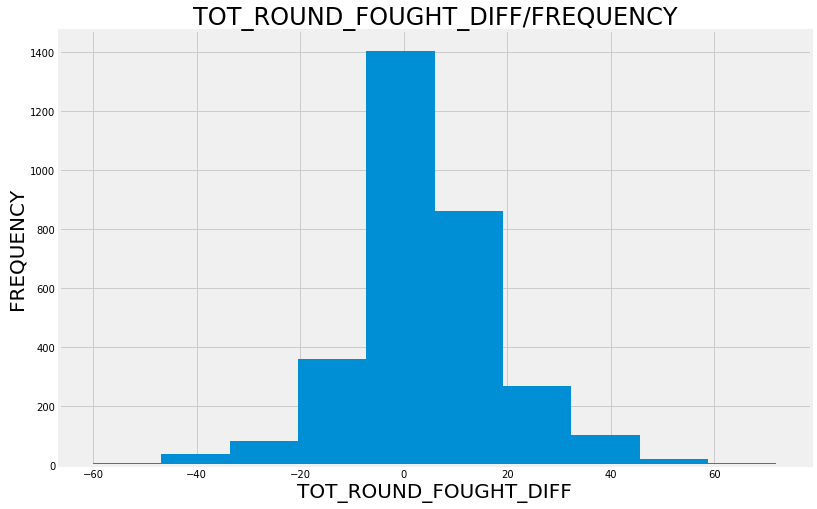

In [106]:
plt.figure(figsize=(12,8))
df['TOT_ROUND_FOUGHT_DIFF'].hist()
plt.xlabel('TOT_ROUND_FOUGHT_DIFF', fontsize=20)
plt.ylabel('FREQUENCY', fontsize=20)
plt.title('TOT_ROUND_FOUGHT_DIFF/FREQUENCY', fontsize=24);

In [107]:
df['LONG_WIN_STREAK'] = df['R_longest_win_streak'] \
                        - df['B_longest_win_streak']

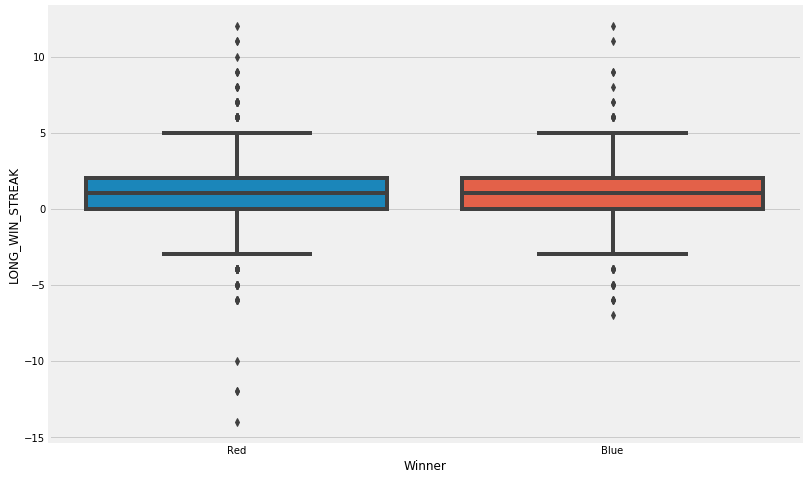

In [108]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Winner', y= 'LONG_WIN_STREAK', data=df);

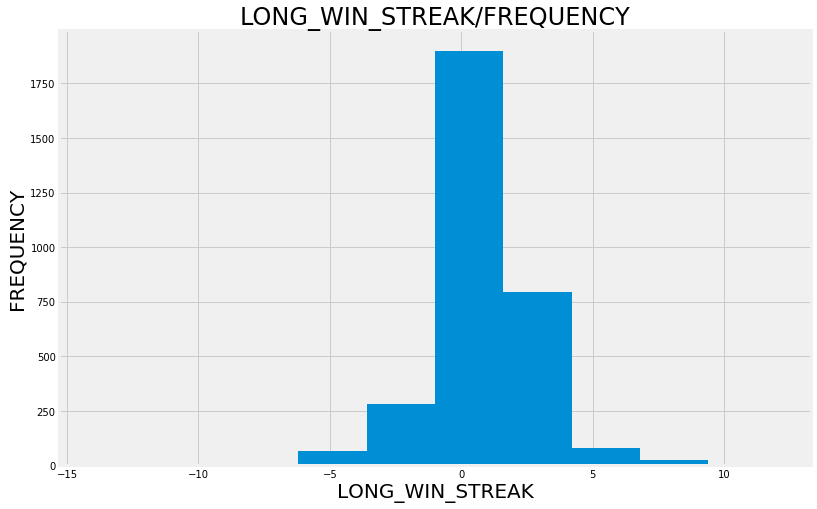

In [109]:
plt.figure(figsize=(12,8))
df['LONG_WIN_STREAK'].hist()
plt.xlabel('LONG_WIN_STREAK', fontsize=20)
plt.ylabel('FREQUENCY', fontsize=20)
plt.title('LONG_WIN_STREAK/FREQUENCY', fontsize=24);

In [110]:
df['LOSE_STREAK'] = df['R_current_lose_streak'] \
                        - df['B_current_lose_streak']

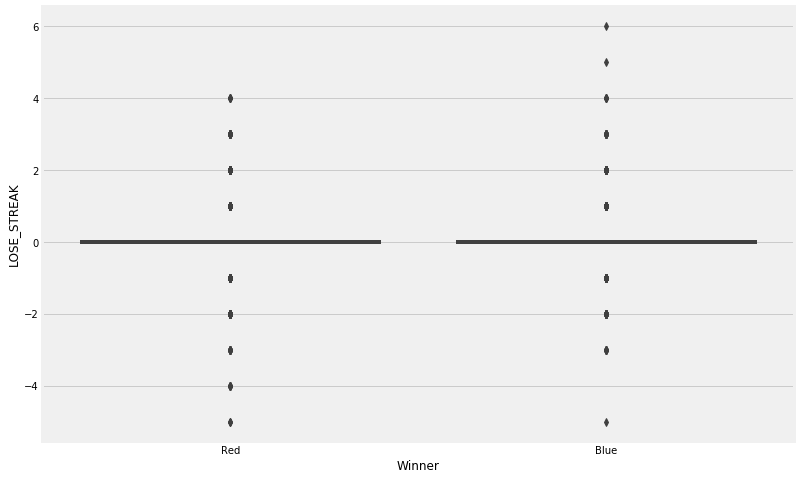

In [111]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Winner', y= 'LOSE_STREAK', data=df);

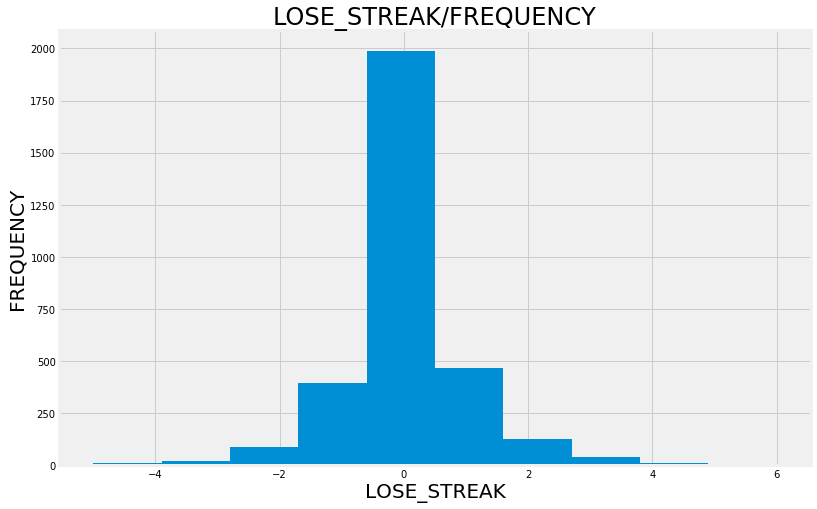

In [112]:
plt.figure(figsize=(12,8))
df['LOSE_STREAK'].hist()
plt.xlabel('LOSE_STREAK', fontsize=20)
plt.ylabel('FREQUENCY', fontsize=20)
plt.title('LOSE_STREAK/FREQUENCY', fontsize=24);

In [113]:
df['WIN_STREAK'] = df['R_current_win_streak'] \
                        - df['B_current_win_streak']

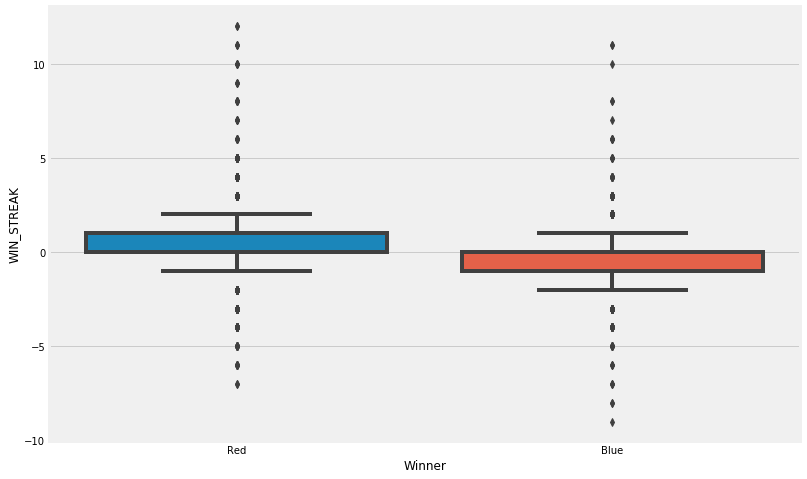

In [114]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Winner', y= 'WIN_STREAK', data=df);

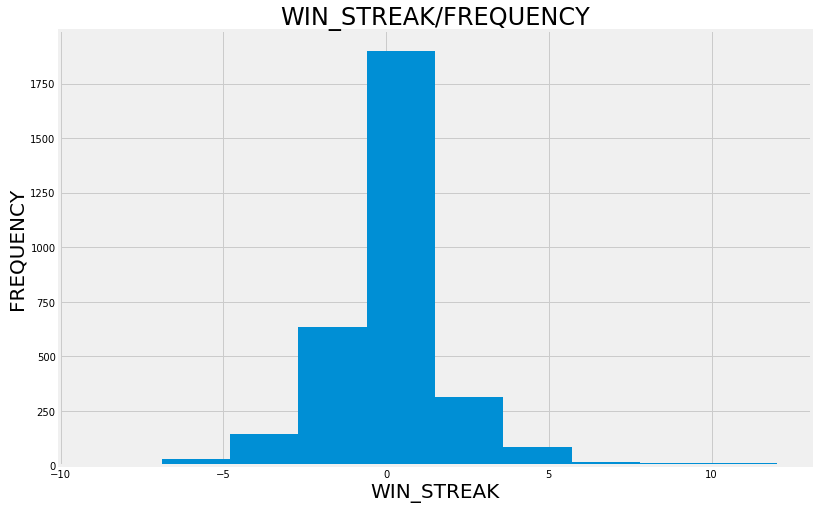

In [115]:
plt.figure(figsize=(12,8))
df['WIN_STREAK'].hist()
plt.xlabel('WIN_STREAK', fontsize=20)
plt.ylabel('FREQUENCY', fontsize=20)
plt.title('WIN_STREAK/FREQUENCY', fontsize=24);

In [116]:
df['TOT_LOSSES_DIFF'] = df['R_losses'] \
                        - df['B_losses']

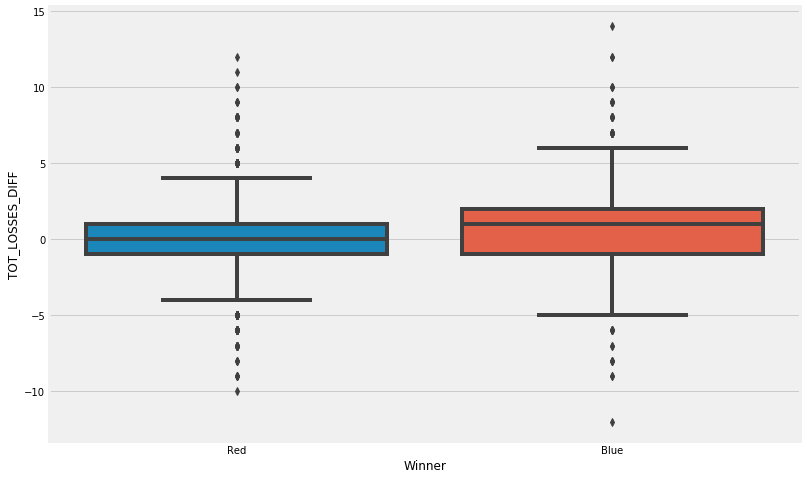

In [117]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Winner', y= 'TOT_LOSSES_DIFF', data=df);

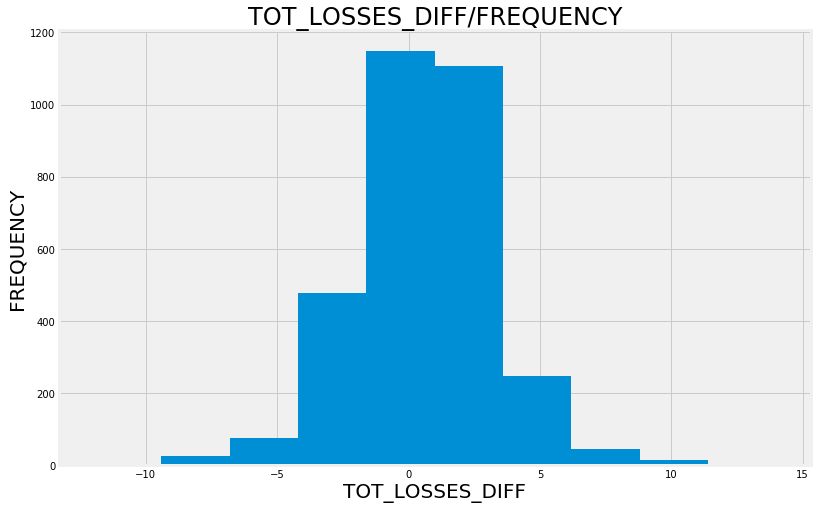

In [118]:
plt.figure(figsize=(12,8))
df['TOT_LOSSES_DIFF'].hist()
plt.xlabel('TOT_LOSSES_DIFF', fontsize=20)
plt.ylabel('FREQUENCY', fontsize=20)
plt.title('TOT_LOSSES_DIFF/FREQUENCY', fontsize=24);

At this point I'm going to check again Random Forest for features importance includind this time our new columns.

In [119]:
X = df.drop('Winner', axis=1)
y = df['Winner']

In [120]:
X = X.select_dtypes(exclude=['object'])
list(X.dtypes)

[dtype('bool'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64')

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [122]:
# Create decision tree classifer object
clf = RandomForestClassifier(random_state=0, n_jobs=-1)

# Train model
model = clf.fit(X_train, y_train)

C:\Users\luigi\Anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [123]:
#do code to support model
#"data" is the X dataframe and model is the SKlearn object

feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X.columns, model.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance',ascending=False,inplace=True)
importances.head(30)
#importances.sort_values(by='Gini-importance').plot(kind='bar', rot=45, figsize=(12,8))

,Gini-importance
AGE_DIFF,0.021715
REV_DIFF,0.015552
B_avg_BODY_att,0.015331
B_avg_BODY_landed,0.015111
B_avg_GROUND_landed,0.014850
R_avg_LEG_att,0.014666
R_avg_TD_pct,0.014464
B_avg_HEAD_att,0.014100
R_avg_TD_att,0.013696
TOT_STR_DIFF,0.013557


It's time now to start building a new model adding new features for a new model and evaluating its goodness. 

# Note on Modeling

In order to find the best Model we are going do add each time several features based on their importance to it.

Next step is to calculate the score so that we can compare those different Models.

Finally once we are satisfied with the score we will proceed with a GridSearch in order to find the best parameters for our final Model.

In [125]:
import pydotplus
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

In [126]:
try:
    from StringIO import StringIO ## for Python 2
except ImportError:
    from io import StringIO ## for Python 3

In [141]:
 def log_regr(X, y):
    ''' train LogRegr Classifier and calculate score on Train and Test data
    
        Args: 
            X: model features (df)
            y: model target feature (df)
            
        Returns: 
            clf: fitted instance of LogReg classifier
            y_pred: prediction made on X_test data (np array)
            train_score_logreg: score for Train data (float)
            test_score_logreg: score for Test data (float)
    '''
    # Train a LogRegr classifier
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
    clf = LogisticRegression()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    # Calculate Score
    train_score_logreg = clf.score(X_train, y_train)
    test_score_logreg = clf.score(X_test, y_test)
    print("LogReg Train score: ", train_score_logreg)
    print("LogReg Test score: ", test_score_logreg)
    print("\n")
    
    return clf, y_pred, train_score_logreg, test_score_logreg

In [169]:
 def dec_tree(X, y):
    ''' train DecTree Classifier using GridSearch and calculate score on Train and Test data
    
        Args: 
            X: model features (df)
            y: model target feature (df)
            
        Returns: 
            dt_grid_search: fitted instance of GridSearch classifier
            dt_gs_train_score: score for Train data (float)
            dt_gs_testing_score: score for Test data (float)
            img: Visualize Decision Tree trained from dataset
    '''
    # Train a DT classifier
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
    clf_dec_tree = DecisionTreeClassifier(random_state=10)  
    clf_dec_tree.fit(X_train, y_train)  
    
    # GridSearch
    dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6]
    }
    
    # Instantiate GridSearchCV
    dt_grid_search = GridSearchCV(clf_dec_tree, dt_param_grid, cv=3, return_train_score=True)
    dt_grid_search.fit(X_train, y_train)
    
    # Calculate Score
    dt_gs_train_score = dt_grid_search.score(X_train, y_train)
    dt_gs_testing_score = dt_grid_search.score(X_test, y_test)
    print("DecTree GridSearch Train score: ", dt_gs_train_score)
    print("DecTree GridSearch Test score: ", dt_gs_testing_score)
    print(f"Optimal Parameters: {dt_grid_search.best_params_}")
    print("\n")
    

    # Visualize Decision Tree trained from dataset
    dot_data = StringIO()
    export_graphviz(clf_dec_tree, out_file=dot_data, filled=True, rounded=True,special_characters=True,
                    feature_names=X.columns, class_names= ['red', 'blue']
                    )
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    img = Image(graph.create_png())

    return clf_dec_tree, dt_grid_search, dt_gs_train_score, dt_gs_testing_score, img

In [170]:
 def rand_for(X, y):
    ''' train RandFor Classifier using GridSearch, calculate score on Train and Test data and 
        Visualize feature importance
    
        Args: 
            X: model features (df)
            y: model target feature (df)
            
        Returns: 
            rf_grid_search: fitted instance of GridSearch classifier
            train_score_randfor: score for Train data (float)
            test_score_randfor: score for Test data (float)
    '''
    # Train a RF classifier
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
    clf_rand_for = RandomForestClassifier(random_state=10, criterion='entropy', max_depth=3)  
    clf_rand_for.fit(X_train, y_train)  
    
    # GridSearch
    rf_param_grid = {
    'n_estimators': [10, 30, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 6, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [3, 6]
    }
    
    # Instantiate GridSearchCV
    rf_grid_search = GridSearchCV(clf_rand_for, rf_param_grid, cv=3)
    rf_grid_search.fit(X_train, y_train)
    
    # Calculate Score
    rf_gs_train_score = rf_grid_search.score(X_train, y_train)
    rf_gs_testing_score = rf_grid_search.score(X_test, y_test)
    print("RandFor GridSearch Train score: ", rf_gs_train_score)
    print("RandFor GridSearch Test score: ", rf_gs_testing_score)
    print(f"Optimal Parameters: {rf_grid_search.best_params_}")
    print("\n")
    
    # Visualize feature_importances in a graph
    n_features = X_train.shape[1]
    plt.figure(figsize=(12,8))
    plt.barh(range(n_features), clf_rand_for.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
    plt.show();
    
    
    return rf_grid_search, rf_gs_train_score, rf_gs_testing_score

In [171]:
def evaluate_models(X, y, name):
    
    clf, y_pred, train_score_logreg, test_score_logreg = log_regr(X, y)
    
    clf_dec_tree, dt_grid_search, dt_gs_train_score, dt_gs_testing_score, img = dec_tree(X, y)
    
    rf_grid_search, rf_gs_train_score, rf_gs_testing_score = rand_for(X, y)
    
    
    
    # Create and print a confusion matrix 
    print('\nConfusion Matrix')
    print('----------------')
    print(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))
    

In [132]:
# def dec_tree(X, y):
#    ''' train DecTree Classifier, calculate score on Train and Test data and Visualize DecTree
#    
#        Args: 
#            X: model features (df)
#            y: model target feature (df)
#            
#        Returns: 
#            clf_dec_tree: fitted instance of DecTree classifier
#            train_score_dectree: score for Train data (float)
#            test_score_dectree: score for Test data (float)
#            img: Visualize Decision Tree trained from dataset
#    '''
#    # Train a DT classifier
#    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
#    clf_dec_tree = DecisionTreeClassifier(random_state=10, criterion='entropy', max_depth=3)  
#    clf_dec_tree.fit(X_train, y_train)  
#    
#    # Calculate Score
#    train_score_dectree = clf_dec_tree.score(X_train, y_train)
#    test_score_dectree = clf_dec_tree.score(X_test, y_test)
#    print("DecTree Train score: ", train_score_dectree)
#    print("DecTree Test score: ", test_score_dectree)
#    print("\n")
#    
#    # Visualize Decision Tree trained from dataset
#    dot_data = StringIO()
#    export_graphviz(clf_dec_tree, out_file=dot_data, filled=True, rounded=True,special_characters=True,
#                    feature_names=X.columns, class_names= ['red', 'blue']
#                    )
#    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#    img = Image(graph.create_png())
#    
#    
#    return clf_dec_tree, train_score_dectree, test_score_dectree, img

In [133]:
# def rand_for(X, y):
#    ''' train RandFor Classifier, calculate score on Train and Test data and Visualize feature importance
#    
#        Args: 
#            X: model features (df)
#            y: model target feature (df)
#            
#        Returns: 
#            clf_rand_for: fitted instance of RandFor classifier
#            train_score_randfor: score for Train data (float)
#            test_score_randfor: score for Test data (float)
#    '''
#    # Train a DT classifier
#    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
#    clf_rand_for = RandomForestClassifier(random_state=10, criterion='entropy', max_depth=3)  
#    clf_rand_for.fit(X_train, y_train)  
#    
#    # Calculate Score
#    train_score_randfor = clf_rand_for.score(X_train, y_train)
#    test_score_randfor = clf_rand_for.score(X_test, y_test)
#    print("RandFor Train score: ", train_score_randfor)
#    print("RandFor Test score: ", test_score_randfor)
#    print("\n")
#    
#    # Visualize feature_importances in a graph
#    n_features = X_train.shape[1]
#    plt.figure(figsize=(12,8))
#    plt.barh(range(n_features), clf_rand_for.feature_importances_, align='center') 
#    plt.yticks(np.arange(n_features), X_train.columns.values) 
#    plt.xlabel('Feature importance')
#    plt.ylabel('Feature')
#    plt.show();
#    
#    
#    return clf_rand_for, train_score_randfor, test_score_randfor

In [134]:

## Visualize feature_importances in a graph
#n_features = X.shape[1]
#plt.figure(figsize=(12,8))
#plt.barh(range(n_features), clf_dec_tree.feature_importances_, align='center') 
#plt.yticks(np.arange(n_features), X_train.columns.values) 
#plt.xlabel('Feature importance')
#plt.ylabel('Feature');

# Model 1

In our first model we are  going to try 3 different top features resulting from our Random Forest feature importance analysis.

In [145]:
df1 = df[['AGE_DIFF','REV_DIFF', 'TOT_STR_DIFF', 'Winner']]
df1.head()

,AGE_DIFF,REV_DIFF,TOT_STR_DIFF,Winner
0,1.0,0.000000,45.500000,Red
1,-1.0,0.142857,33.257143,Red
2,-1.0,0.036559,10.851613,Red
3,3.0,-0.250000,-36.000000,Blue
4,-6.0,0.000000,-29.250000,Blue


In [146]:
X = df1.drop('Winner', axis=1)
y = df1['Winner']

In [147]:
X.shape

(3150, 3)

In [148]:
y.shape

(3150,)

C:\Users\luigi\Anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogReg Train score:  0.6566469093988145
LogReg Test score:  0.618020304568528


DecTree GridSearch Train score:  0.6558001693480101
DecTree GridSearch Test score:  0.618020304568528
Optimal Parameters: {'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}




C:\Users\luigi\Anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandFor GridSearch Train score:  0.6494496189669772
RandFor GridSearch Test score:  0.6104060913705583
Optimal Parameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 30}




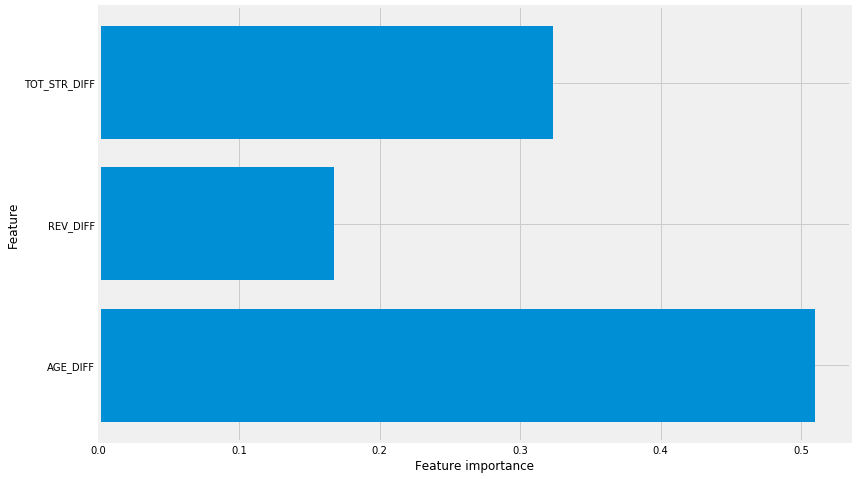


Confusion Matrix
----------------
Predicted  Blue  Red  All
True                     
Blue         33  274  307
Red          27  454  481
All          60  728  788


In [173]:
evaluate_models(X, y, 'model_1')

### As we can see all our models did poorly overall, but still significantly better than we  would expect from random guessing, which would have ~10% accuracy.

### The most important feature is the 'age difference' followed by total strikes and reversals.

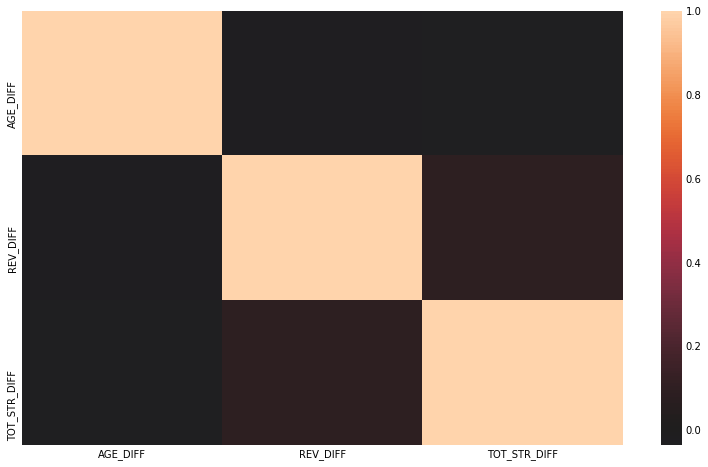

In [174]:
plt.figure(figsize=(12,8))
sns.heatmap(df1.corr(), center=0);

In [175]:
for x, y in zip(clf.coef_[0], ['AGE_DIFF','REV_DIFF', 'TOT_STR_DIFF']):
    print(f'{y} {x}')

AttributeError: 'RandomForestClassifier' object has no attribute 'coef_'

# Model 2 

In our second model we are  going to try 5 different top features resulting from our Random Forest feature importance analysis.

In [176]:
df2 = df[['AGE_DIFF','REV_DIFF', 'TOT_STR_DIFF', 'TOT_ROUND_FOUGHT_DIFF', 'TAKEDOWN_ATT_DIFF', 'Winner']]
df2.head()

,AGE_DIFF,REV_DIFF,TOT_STR_DIFF,TOT_ROUND_FOUGHT_DIFF,TAKEDOWN_ATT_DIFF,Winner
0,1.0,0.000000,45.500000,18.0,4.500000,Red
1,-1.0,0.142857,33.257143,-4.0,4.142857,Red
2,-1.0,0.036559,10.851613,-35.0,-1.227957,Red
3,3.0,-0.250000,-36.000000,11.0,-0.250000,Blue
4,-6.0,0.000000,-29.250000,-1.0,0.500000,Blue


In [177]:
X = df2.drop('Winner', axis=1)
y = df2['Winner']

C:\Users\luigi\Anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogReg Train score:  0.6591871295512278
LogReg Test score:  0.6218274111675127


DecTree GridSearch Train score:  0.6629974597798476
DecTree GridSearch Test score:  0.6129441624365483
Optimal Parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}




C:\Users\luigi\Anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandFor GridSearch Train score:  0.6917866215071973
RandFor GridSearch Test score:  0.616751269035533
Optimal Parameters: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 6, 'min_samples_split': 5, 'n_estimators': 30}




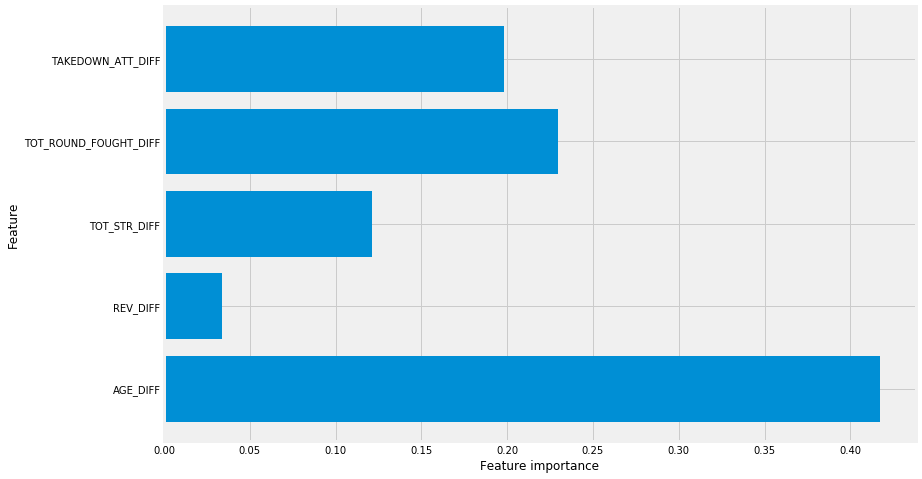


Confusion Matrix
----------------
Predicted  Blue  Red  All
True                     
Blue         43  264  307
Red          34  447  481
All          77  711  788


In [182]:
evaluate_models(X, y, 'model_2')

### As we can see all our models did poorly overall, but still significantly better than we  would expect from random guessing, which would have ~10% accuracy.

### The most important feature results being the age difference followed by the total number of rounds fought.

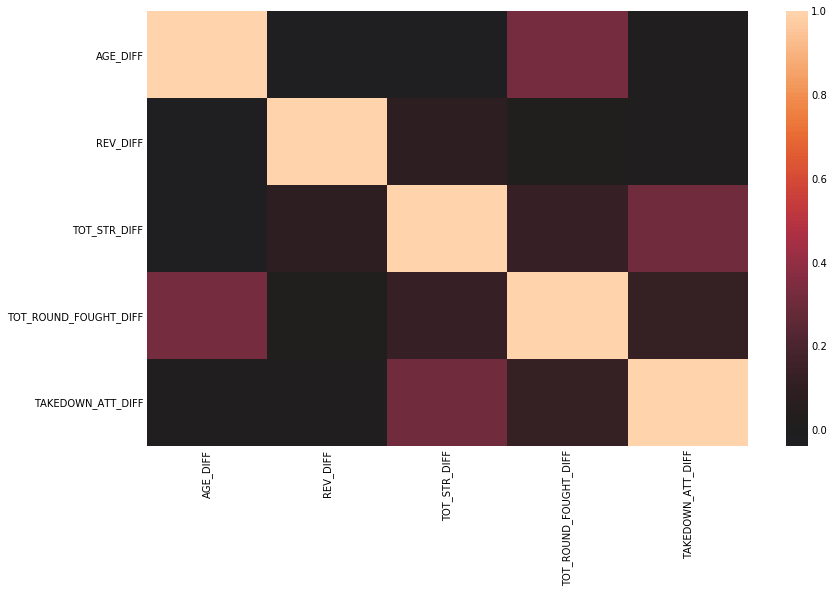

In [183]:
plt.figure(figsize=(12,8))
sns.heatmap(df2.corr(), center=0);

There's no correlation between these features as we can see from the heatmap.

In [184]:
for x, y in zip(clf.coef_[0], ['AGE_DIFF','REV_DIFF', 'TOT_STR_DIFF', 'TOT_ROUND_FOUGHT_DIFF', 'TAKEDOWN_ATT_DIFF']):
    print(f'{y} {x}')

AttributeError: 'RandomForestClassifier' object has no attribute 'coef_'

# Model 3

In our third model we are  going to try 8 different top features resulting from our Random Forest feature importance analysis.

In [193]:
df3 = df[['AGE_DIFF','REV_DIFF', 'TOT_STR_DIFF', 'TOT_ROUND_FOUGHT_DIFF', 
          'TAKEDOWN_ATT_DIFF', 'SECONDS_FOUGHT_DIFF', 'HEAD_STR_DIFF', 'LEG_DIFF', 'Winner']]
df3.head()

,AGE_DIFF,REV_DIFF,TOT_STR_DIFF,TOT_ROUND_FOUGHT_DIFF,TAKEDOWN_ATT_DIFF,SECONDS_FOUGHT_DIFF,HEAD_STR_DIFF,LEG_DIFF,Winner
0,1.0,0.000000,45.500000,18.0,4.500000,323.200000,12.700000,-1.700000,Red
1,-1.0,0.142857,33.257143,-4.0,4.142857,213.000000,5.000000,4.514286,Red
2,-1.0,0.036559,10.851613,-35.0,-1.227957,22.529032,12.341935,-0.993548,Red
3,3.0,-0.250000,-36.000000,11.0,-0.250000,38.250000,-29.750000,9.000000,Blue
4,-6.0,0.000000,-29.250000,-1.0,0.500000,-759.250000,-22.250000,1.000000,Blue


In [194]:
X = df3.drop('Winner', axis=1)
y = df3['Winner']

LogReg Train score:  0.6663844199830652
LogReg Test score:  0.6218274111675127




C:\Users\luigi\Anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


DecTree GridSearch Train score:  0.663844199830652
DecTree GridSearch Test score:  0.616751269035533
Optimal Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}




C:\Users\luigi\Anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandFor GridSearch Train score:  0.6981371718882303
RandFor GridSearch Test score:  0.6294416243654822
Optimal Parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 6, 'min_samples_split': 5, 'n_estimators': 30}




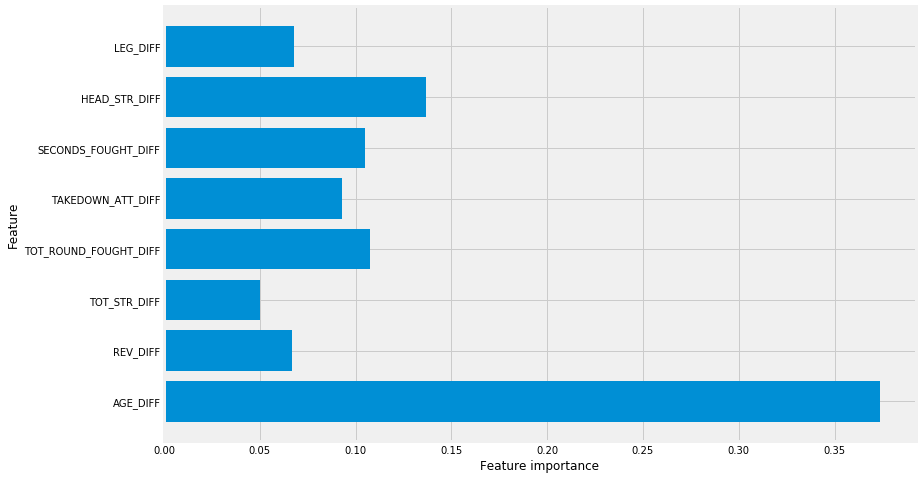


Confusion Matrix
----------------
Predicted  Blue  Red  All
True                     
Blue         50  257  307
Red          41  440  481
All          91  697  788


In [195]:
evaluate_models(X, y, 'model_3')

### As we can see all our models did poorly overall, but still significantly better than we  would expect from random guessing, which would have ~10% accuracy.

### "Age difference" is still the most important feature while the second in this model is head strikes difference.

### In the third position we have 2 features that are expressing basically the same thing, total seconds fought and total rounds fought, indicating the overall experience of a fighter.

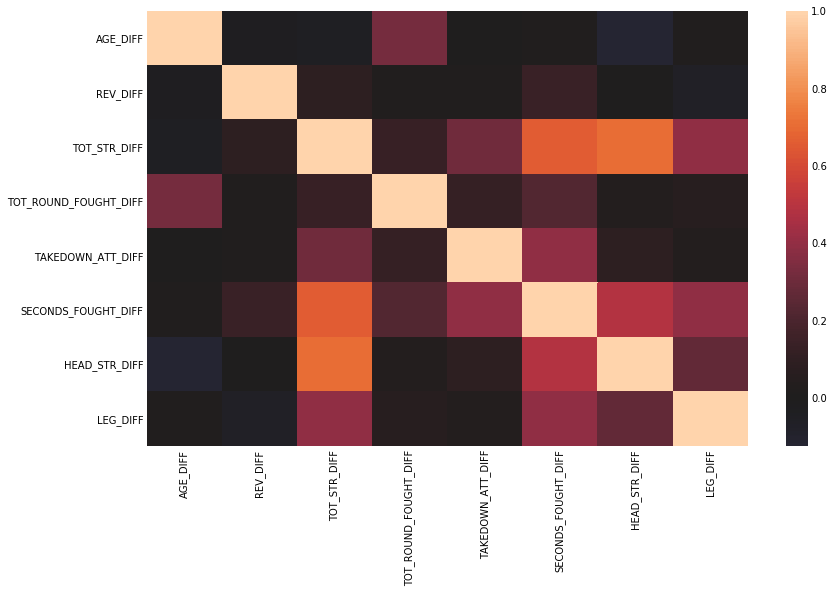

In [187]:
plt.figure(figsize=(12,8))
sns.heatmap(df3.corr(), center=0);

As we can see from the heatmap we found correlation between seconds fought and total strikes and head strikes and total strikes obviously as expected.

In [ ]:
for x, y in zip(clf.coef_[0], ['AGE_DIFF','REV_DIFF', 'TOT_STR_DIFF', 'TOT_ROUND_FOUGHT_DIFF', 
          'TAKEDOWN_ATT_DIFF', 'SECONDS_FOUGHT_DIFF', 'HEAD_STR_DIFF', 'LEG_DIFF']):
    print(f'{y} {x}')

# Model 4

In our fourth model we are  going to try 12 different top features resulting from our Random Forest feature importance analysis.

In [188]:
df4 = df[['AGE_DIFF','REV_DIFF', 'TOT_STR_DIFF', 'TOT_ROUND_FOUGHT_DIFF', 
          'TAKEDOWN_ATT_DIFF', 'SECONDS_FOUGHT_DIFF', 'HEAD_STR_DIFF', 'LEG_DIFF',
          'TOT_LOSSES_DIFF', 'SIG_STR_ATT_DIFF', 'GROUND_STR_DIFF', 'TAKEDOWN_DIFF', 'Winner']]
df4.head()

,AGE_DIFF,REV_DIFF,TOT_STR_DIFF,TOT_ROUND_FOUGHT_DIFF,TAKEDOWN_ATT_DIFF,SECONDS_FOUGHT_DIFF,HEAD_STR_DIFF,LEG_DIFF,TOT_LOSSES_DIFF,SIG_STR_ATT_DIFF,GROUND_STR_DIFF,TAKEDOWN_DIFF,Winner
0,1.0,0.000000,45.500000,18.0,4.500000,323.200000,12.700000,-1.700000,1.0,36.000000,4.500000,1.700000,Red
1,-1.0,0.142857,33.257143,-4.0,4.142857,213.000000,5.000000,4.514286,-4.0,-23.042857,14.528571,1.928571,Red
2,-1.0,0.036559,10.851613,-35.0,-1.227957,22.529032,12.341935,-0.993548,-7.0,27.333333,0.460215,-0.277419,Red
3,3.0,-0.250000,-36.000000,11.0,-0.250000,38.250000,-29.750000,9.000000,2.0,-24.500000,-9.875000,-0.625000,Blue
4,-6.0,0.000000,-29.250000,-1.0,0.500000,-759.250000,-22.250000,1.000000,0.0,-141.250000,0.500000,0.000000,Blue


In [189]:
X = df4.drop('Winner', axis=1)
y = df4['Winner']

C:\Users\luigi\Anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogReg Train score:  0.6587637595258256
LogReg Test score:  0.6205583756345178


DecTree GridSearch Train score:  0.6748518204911093
DecTree GridSearch Test score:  0.6281725888324873
Optimal Parameters: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 2}




C:\Users\luigi\Anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandFor GridSearch Train score:  0.7087214225232854
RandFor GridSearch Test score:  0.6256345177664975
Optimal Parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 100}




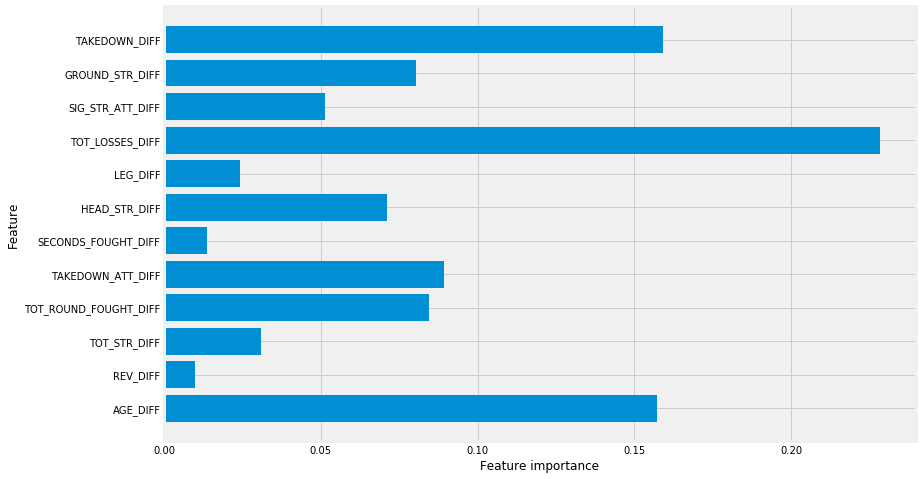


Confusion Matrix
----------------
Predicted  Blue  Red  All
True                     
Blue         55  252  307
Red          47  434  481
All         102  686  788


In [190]:
evaluate_models(X, y, 'model_4')

### As we can see all our models did poorly overall, but still significantly better than we  would expect from random guessing, which would have ~10% accuracy.

### In this model our top feature becomes the total number of losses suffered by a fighter.
### An high number of losses as expected results being the top feature measuring a potential loss.
### In the second position we find 2 different features, "age difference"  and "takedowns".
### Results being so a really important feature the number of takedowns, in fact we can see that ground strikes is another really important feature following the 'overall experience' of a fighter.
### From the analysis results that ground strikes are decisive and being able for a fighter to perform takedowns makes him in a superior position overall in order to deliver those kind of strikes.
### Not surprising a lot of champions in different divisions have a background in Combat Sports as Wrestling and Sambo where the takedowns are one of the predominant techniques.
### Age is really important, younger fighter results being winners more often than older fighters, but also the experience, expressed in total round fought is really valuable.

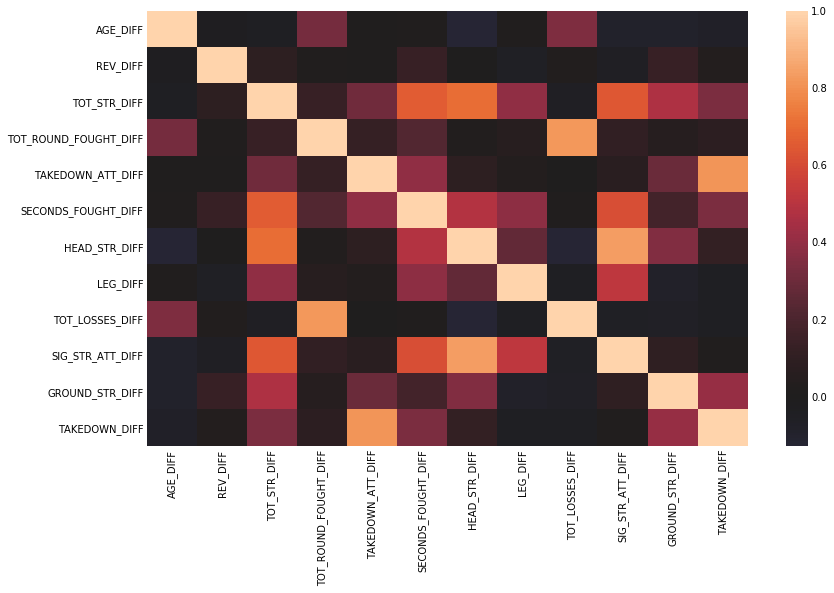

In [191]:
plt.figure(figsize=(12,8))
sns.heatmap(df4.corr(), center=0);

In [ ]:
for x, y in zip(clf.coef_[0], ['AGE_DIFF','REV_DIFF', 'TOT_STR_DIFF', 'TOT_ROUND_FOUGHT_DIFF', 
          'TAKEDOWN_ATT_DIFF', 'SECONDS_FOUGHT_DIFF', 'HEAD_STR_DIFF', 'LEG_DIFF']):
    print(f'{y} {x}')

# Final Comments

## From our analysis, based on our prediction, we advice our clients when betting to consider in order of importance these factors:

# 1. Total Number of Losses of the Fighter

# 2. Age of the Fighter

# 3. Takedown Capabilities(Related Fighter Background Techniques)

# 4. Total Number of Rounds Fought

![https://raw.githubusercontent.com/illumi91/dsc-mod-5-project-online-ds-pt-051319/master/images/UFC-Fighters-Dark-Background-McGregor-vs-Cerrone-UFC-Logo.jpg](https://raw.githubusercontent.com/illumi91/dsc-mod-5-project-online-ds-pt-051319/master/images/UFC-Fighters-Dark-Background-McGregor-vs-Cerrone-UFC-Logo.jpg)

# Which will be the winner between McGregor VS Cerrone?

In [ ]:
#def evaluate_models(X, y, name):
#    
#    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
#    
#    # Train a LogRegr classifier
#    clf = LogisticRegression()
#    clf.fit(X_train, y_train)
#    y_pred = clf.predict(X_test)
#    
#    # Calculate Score
#    train_score_logreg = clf.score(X_train, y_train)
#    test_score_logreg = clf.score(X_test, y_test)
#    print("LogReg Train score: ", train_score_logreg)
#    print("LogReg Test score: ", test_score_logreg)
#    print("\n")
#    
#    # Train a DT classifier
#    clf_dec_tree = DecisionTreeClassifier(random_state=10, criterion='entropy', max_depth=3)  
#    
#    # GridSearch
#    dt_param_grid = {
#    'criterion': ['gini', 'entropy'],
#    'max_depth': [None, 2, 3, 4, 5, 6],
#    'min_samples_split': [2, 5, 10],
#    'min_samples_leaf': [1, 2, 3, 4, 5, 6]
#    }
#    
#    # Instantiate GridSearchCV
#    dt_grid_search = GridSearchCV(clf_dec_tree, dt_param_grid, cv=3, return_train_score=True)
#
#    # Fit to the data
#    dt_grid_search.fit(X_train, y_train)
#    
#    # Score
#    
#    # Mean training score
#    dt_gs_training_score = np.mean(dt_grid_search.cv_results_['mean_train_score'])
#
#    # Mean test score
#    dt_gs_testing_score = dt_grid_search.score(X_test, y_test)
#
#    print(f"Mean Training Score: {dt_gs_training_score :.2%}")
#    print(f"Mean Test Score: {dt_gs_testing_score :.2%}")
#    print("Best Parameter Combination Found During Grid Search:")
#    dt_grid_search.best_params_
#    
#    # Calculate Score
#    train_score_dectree = clf_dec_tree.score(X_train, y_train)
#    test_score_dectree = clf_dec_tree.score(X_test, y_test)
#    print("DecTree Train score: ", train_score_dectree)
#    print("DecTree Test score: ", test_score_dectree)
#    print("\n")
#    # Create and print a confusion matrix 
#    print('\nConfusion Matrix')
#    print('----------------')
#    print(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))
#    
#    # Visualize the tree trained from complete dataset
#    
#    n_features = X_train.shape[1]
#    plt.figure(figsize=(12,8))
#    plt.barh(range(n_features), clf_dec_tree.feature_importances_, align='center') 
#    plt.yticks(np.arange(n_features), X_train.columns.values) 
#    plt.xlabel('Feature importance')
#    plt.ylabel('Feature')
#    
#    
#    # Vaisualize Decision Tree Graph
#    
#    dot_data = StringIO()
#    export_graphviz(clf_dec_tree, out_file=dot_data, filled=True, rounded=True,special_characters=True,
#                    feature_names=X.columns, class_names= ['red', 'blue']
#                    )
#    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#    img = Image(graph.create_png())
#    return img, name, train_score_logreg, test_score_logreg, train_score_dectree, test_score_dectree